In [ ]:
import os
import cv2
from math import ceil,sqrt
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import time
import math
import cmath
import sys
from scipy.ndimage import morphology as morph
from skimage.morphology import disk
IMAGES_FOLDER_PATH = "/content/drive/My Drive/Assignment_3/images"

In [ ]:
def verify(img, SE):
    for i in range(3):
        for j in range(3):
            if SE[i][j] == -1:
                continue
            elif SE[i][j] != img[i][j]:
                return 0
    return 1
def apply_filter(img, s):
    h, w = img.shape
    copy = img.copy()
    for i in range(1,h-1):
        for j in range(1,w-1):
            mat = img[i-1:i+2, j-1: j+2]
            if verify(mat, s) == 1:
                copy[i,j] = 0
    return copy
    
def skeletonization(input_img, showIters = False):
    s1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]])
    s2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])
    inp = input_img.copy()
    while True:
        prev_img = inp.copy()
        inp = apply_filter(inp, s1)
        inp = apply_filter(inp, s2)
        inp = apply_filter(inp, np.rot90(s1, 1))
        inp = apply_filter(inp, np.rot90(s2, 1))
        inp = apply_filter(inp, np.rot90(s1, 2))
        inp = apply_filter(inp, np.rot90(s2, 2))
        inp = apply_filter(inp, np.rot90(s1, 3))
        inp = apply_filter(inp, np.rot90(s2, 3))
        if showIters == True:
            plt.figure(figsize = (20,10))
            plt.imshow(inp, cmap='gray')
            plt.show()
        if np.sum(np.abs(inp - prev_img)) == 0:
            break 
    return inp

### Part - 2: 
The structuring elements $S_1$ and $S_2$ help to achieve this purpose.  
They are used in HAM transforms and the identified patterns are set to background.


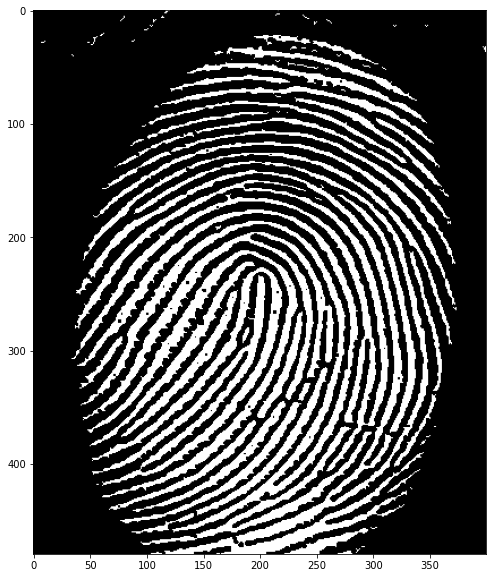

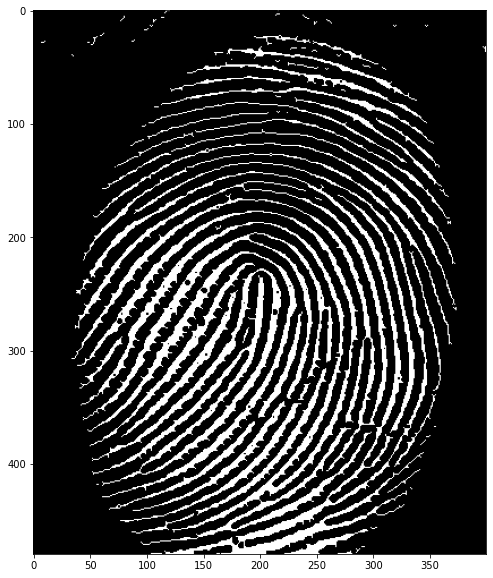

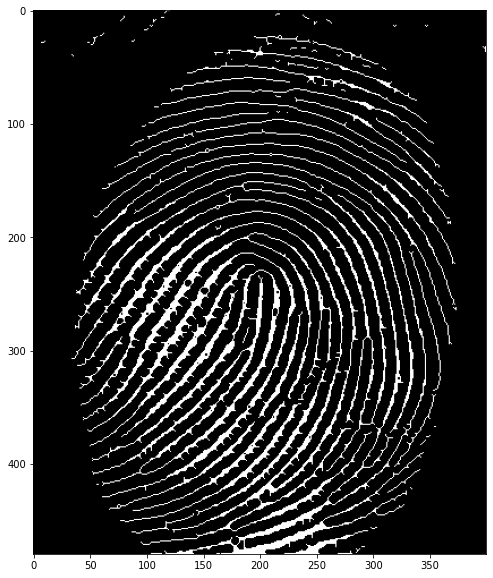

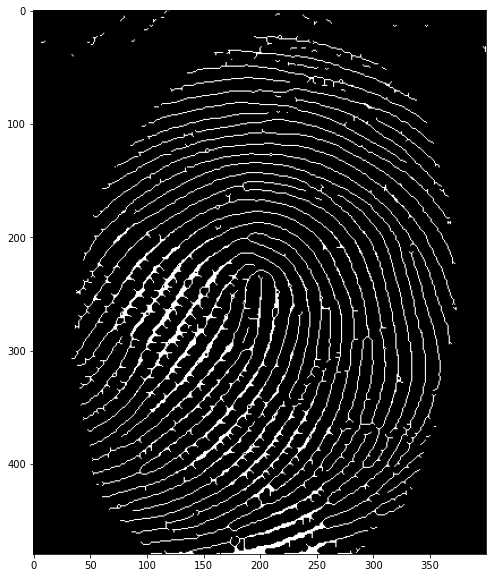

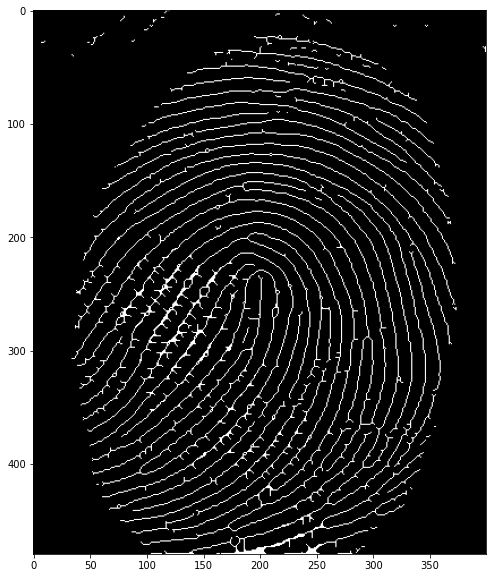

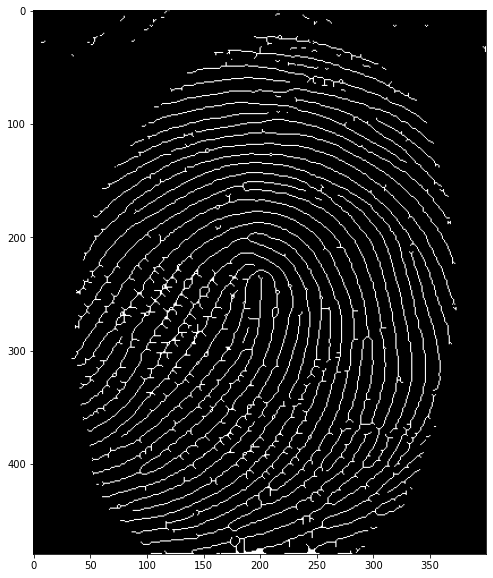

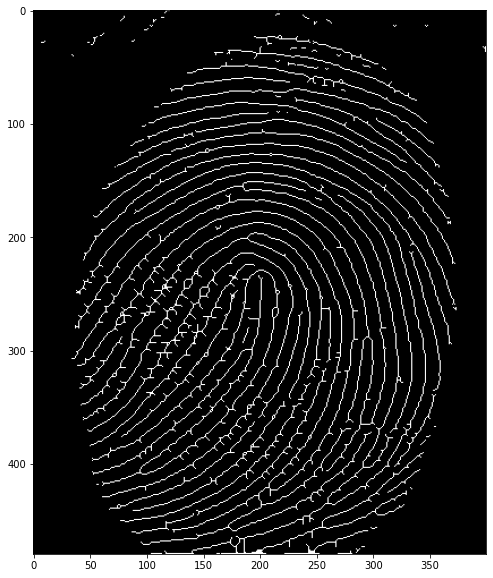

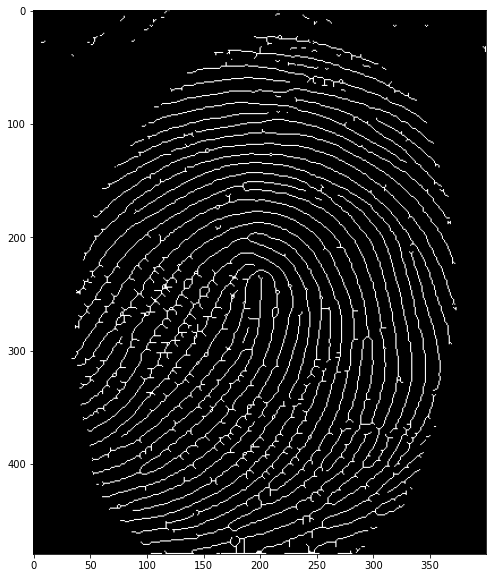

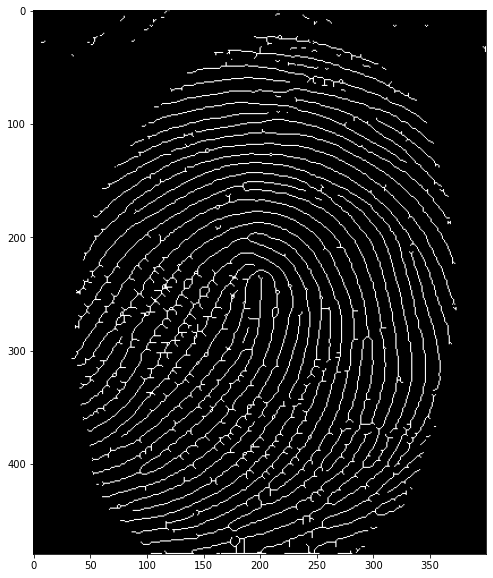

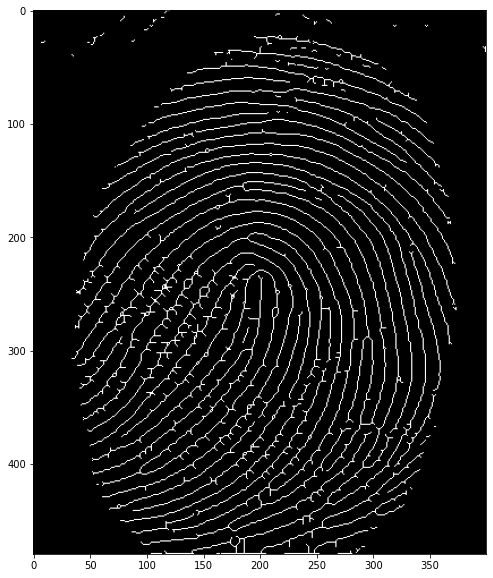

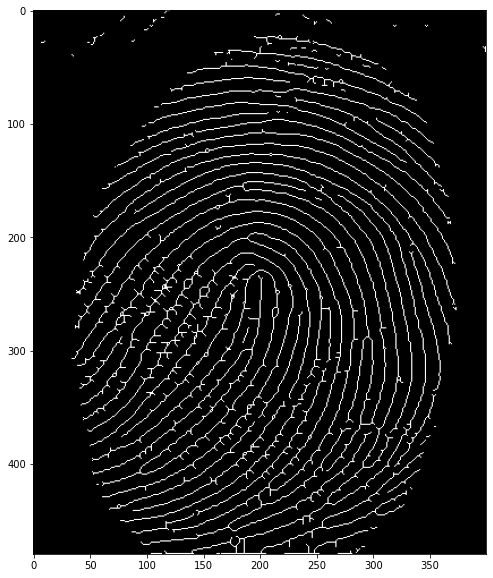

74.67997527122498


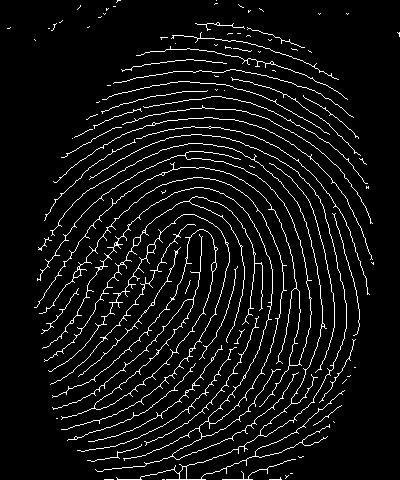

In [ ]:
thumb = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "thumb_print.jpg") , 0)
i, ret = cv2.threshold(thumb,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret = 255 - ret
ret = np.uint8(ret/255)
t = time.time()
out = skeletonization(ret,True)
print (time.time()-t)
cv2_imshow(out * 255)

### Part - 3: Multiple passes are required in skeletonization, since in one pass the boundaries and corners might not be completely removed, thus we need to do more passes until the boundaries and corners are completely removed to form a skeleton of the image.

In [ ]:
dragon = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "dragon.png") ,0)
_,dragon_t = cv2.threshold(dragon,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# dragon_t = 255 - dragon_t
dragon_t = np.uint8(dragon_t/255)
# cv2_imshow(dragon)
dragon_out = skeletonization(dragon_t,False)

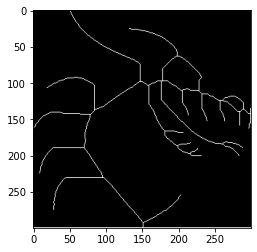

In [ ]:
plt.imshow(dragon_out,cmap='gray')

In [ ]:
butterfly = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "butterfly.jpg") , 0)
_,butterfly_t = cv2.threshold(butterfly,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # butterfly_t = 255 - butterfly_t
butterfly_t = np.uint8(butterfly_t/255)
butterfly_out = skeletonization(butterfly_t,False)


KeyboardInterrupt: ignored

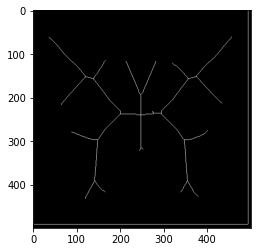

In [ ]:
plt.imshow(butterfly_out,cmap='gray')

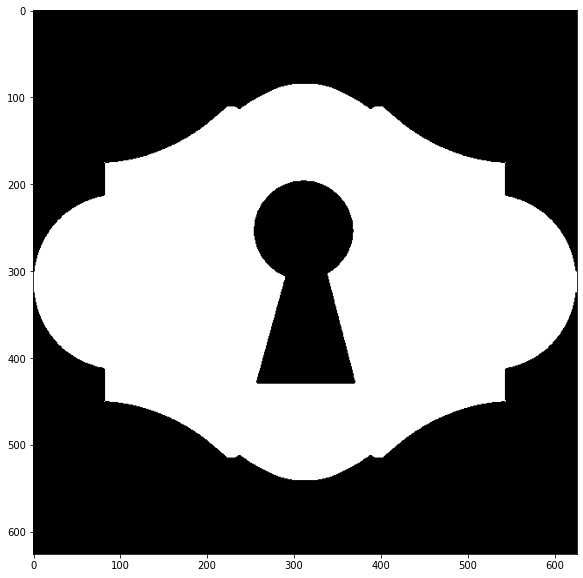

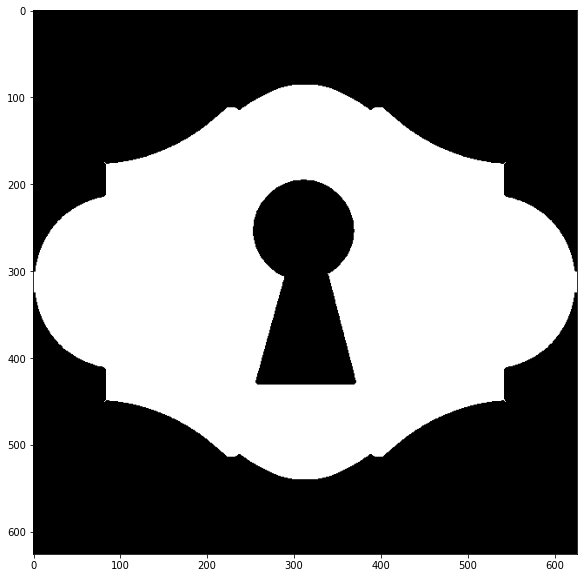

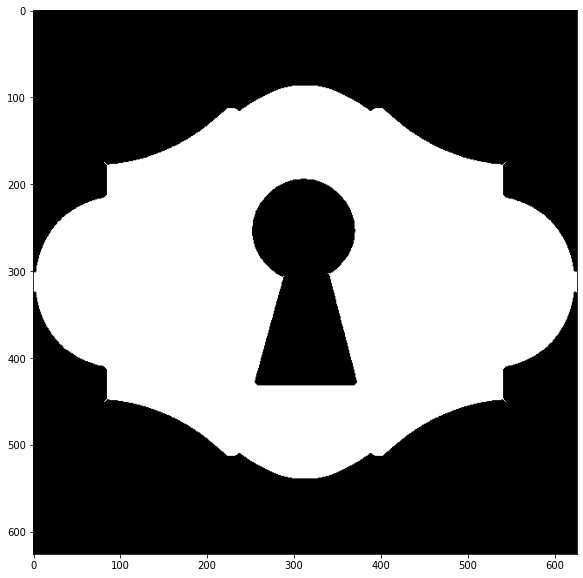

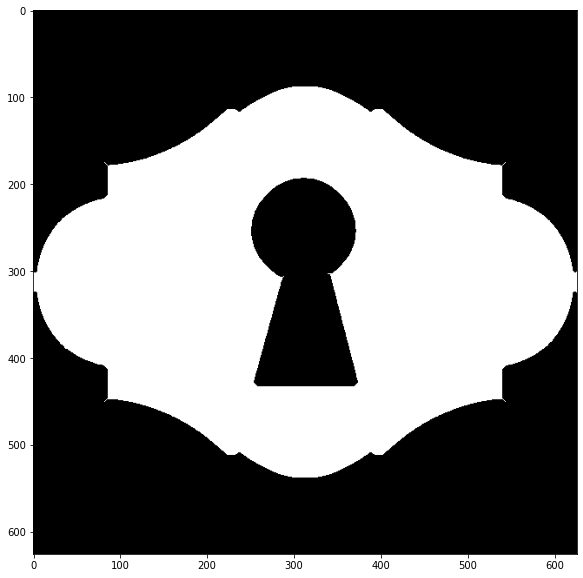

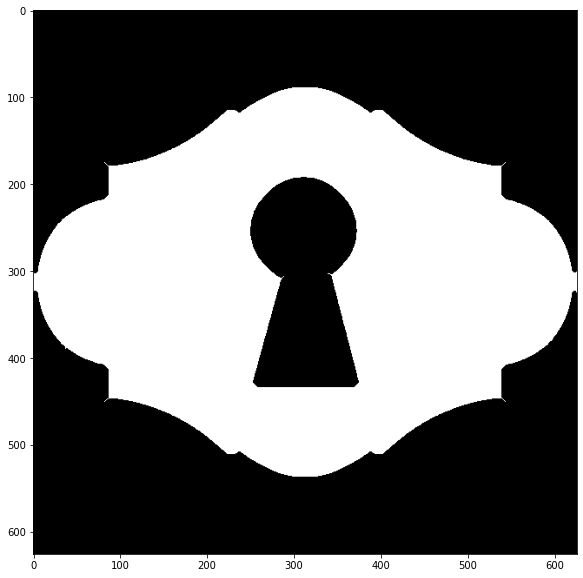

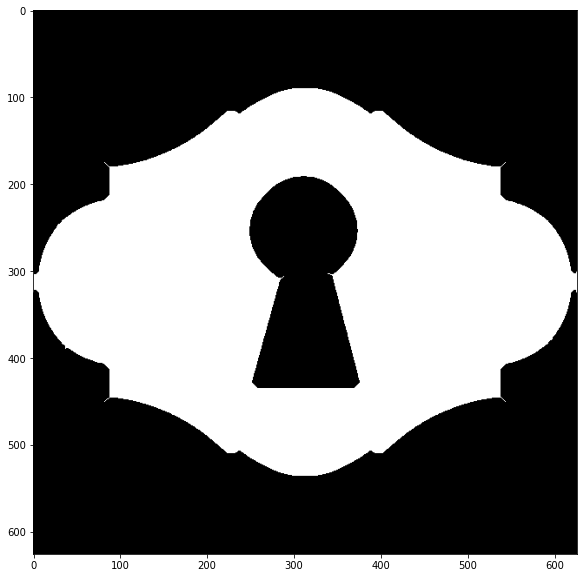

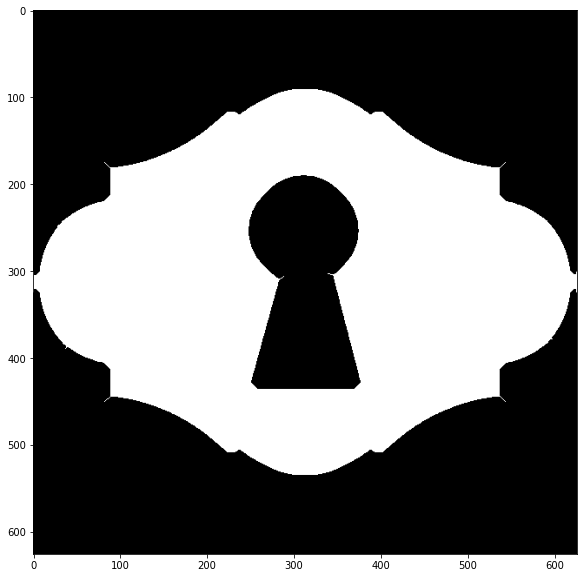

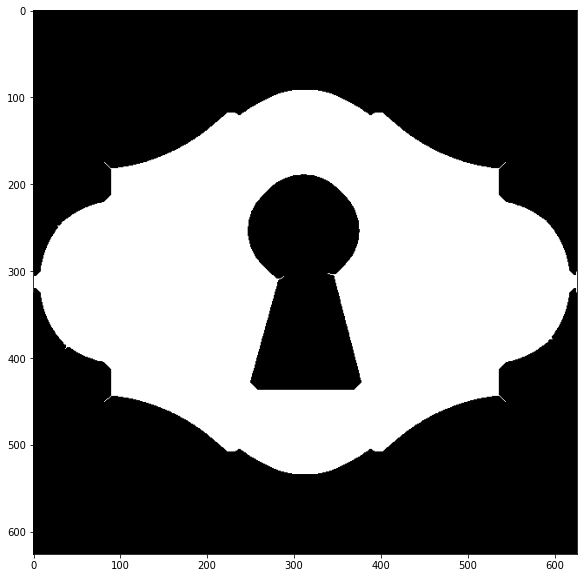

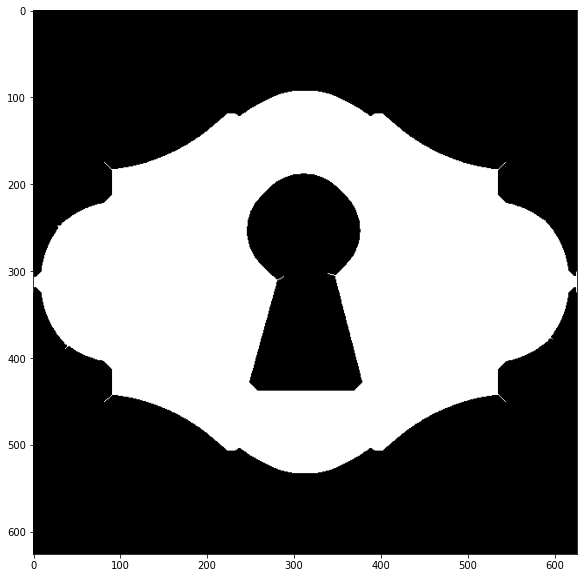

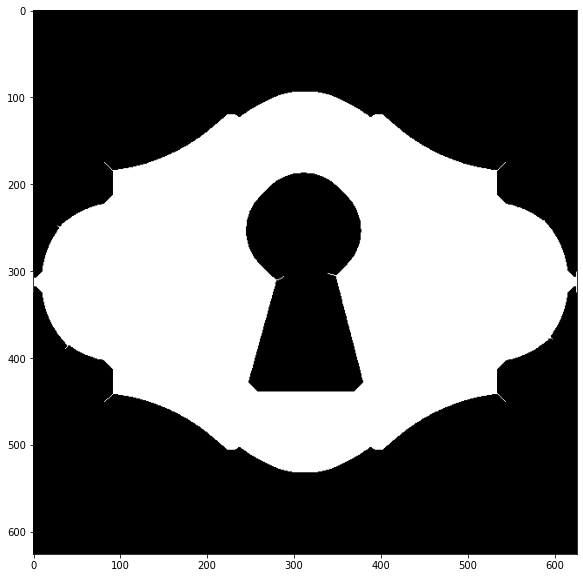

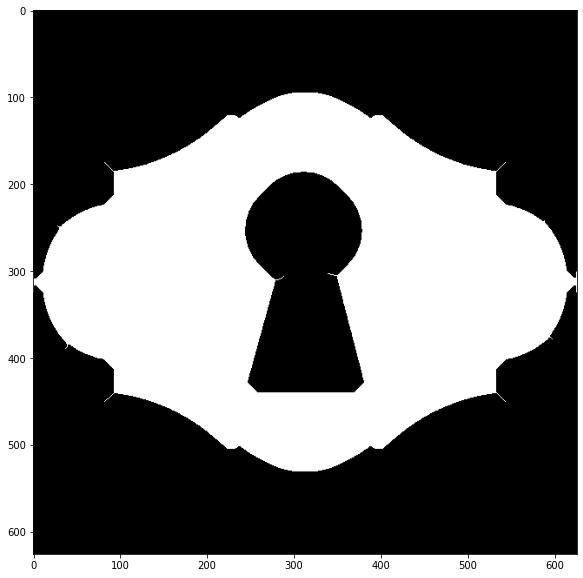

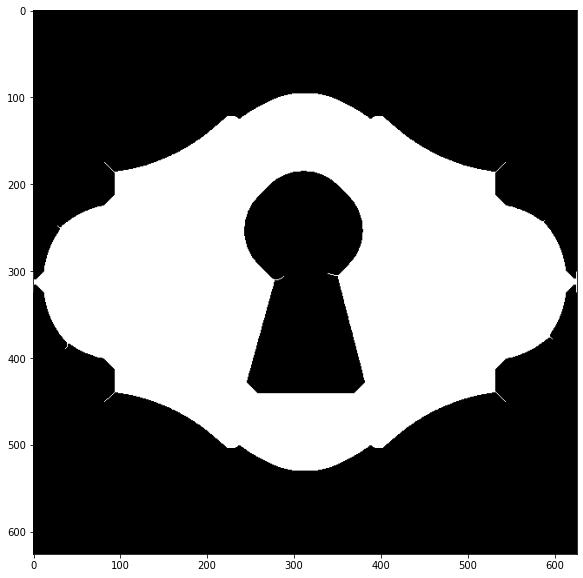

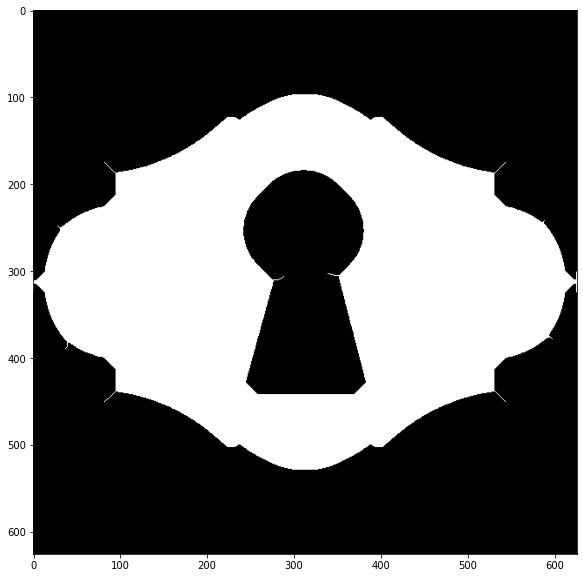

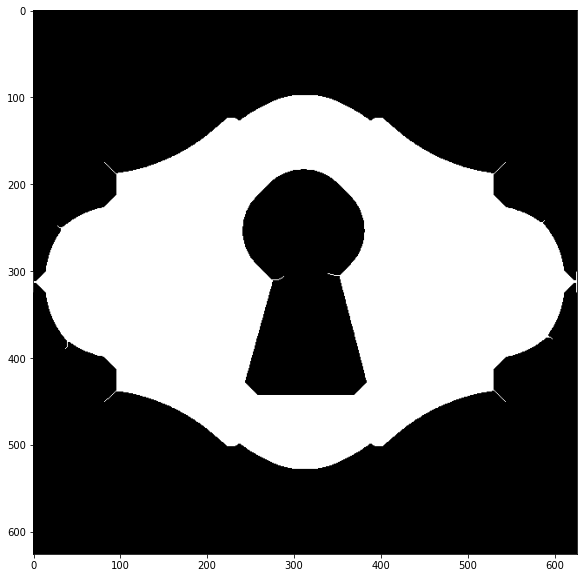

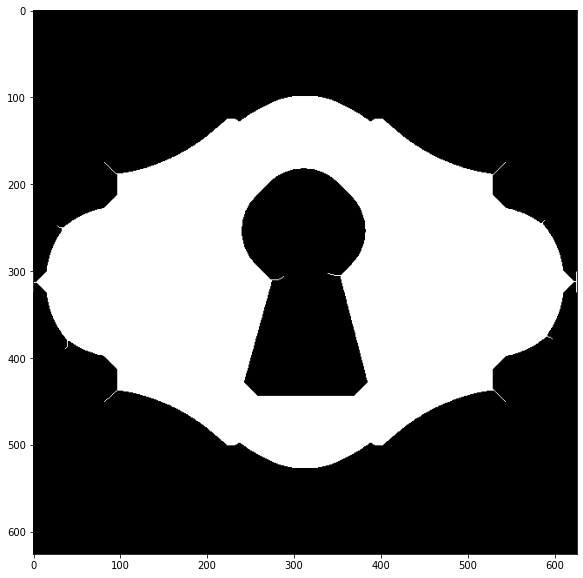

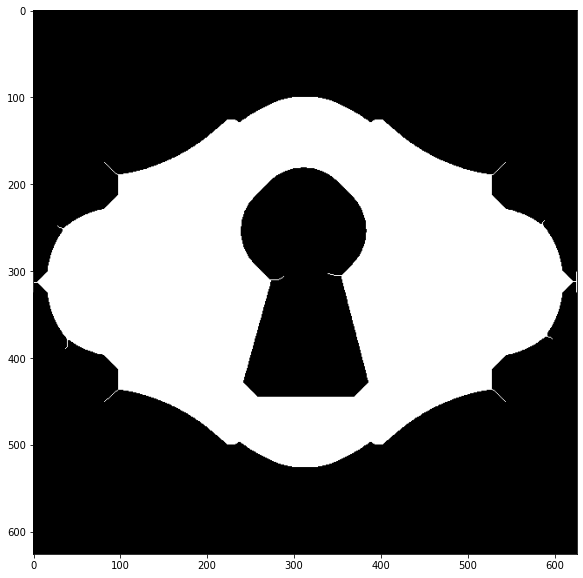

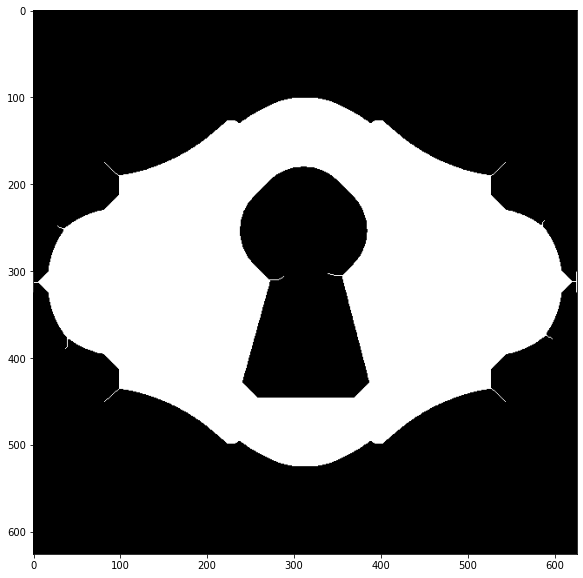

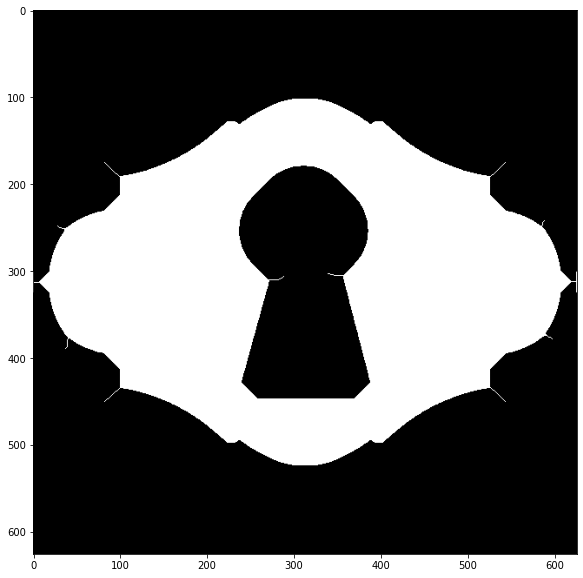

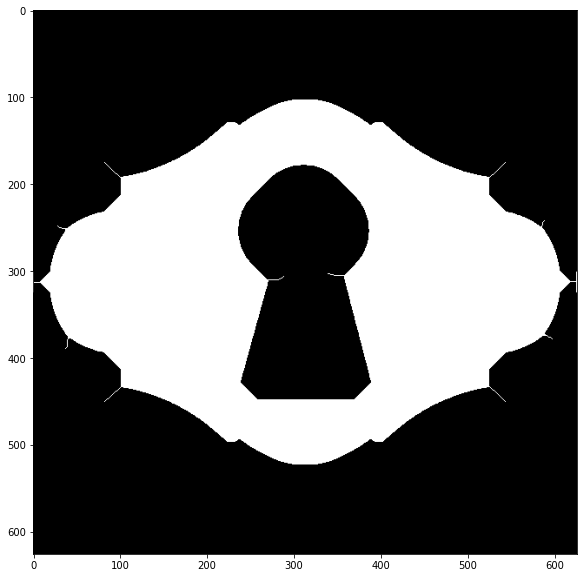

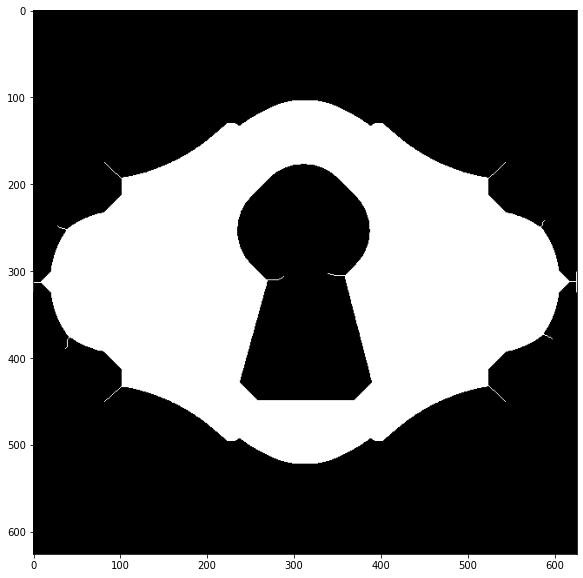

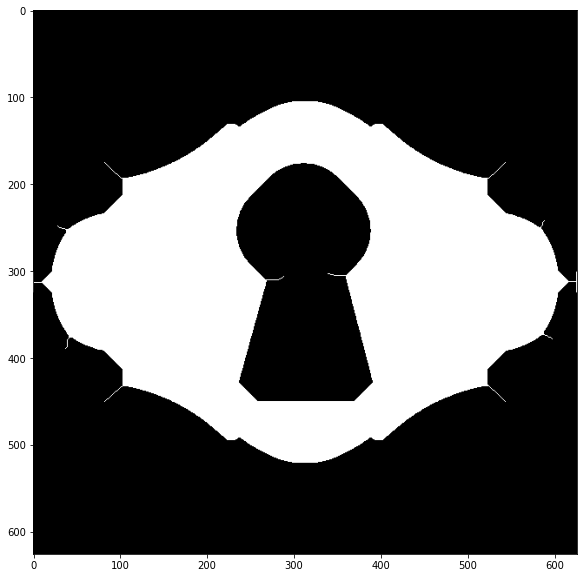

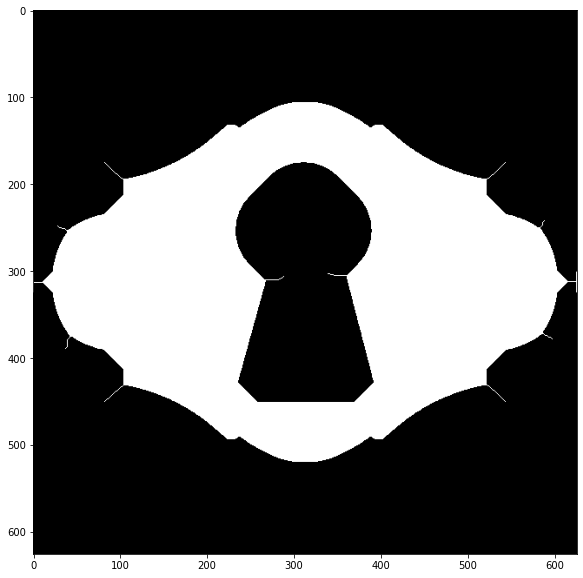

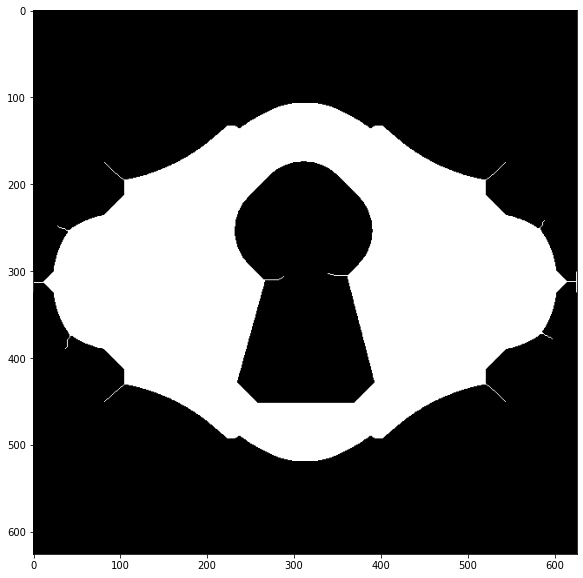

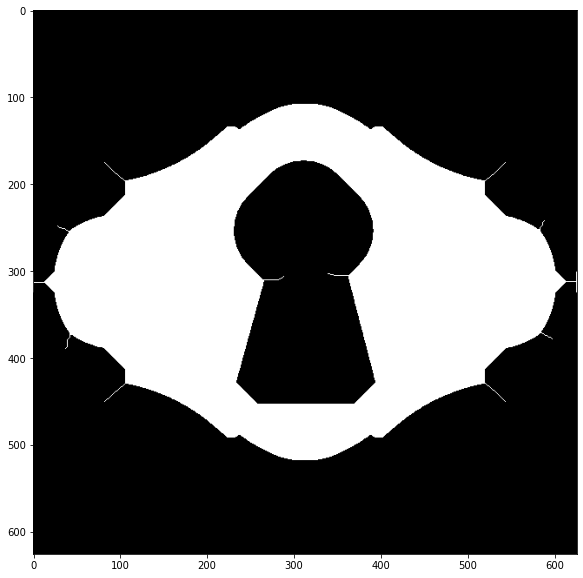

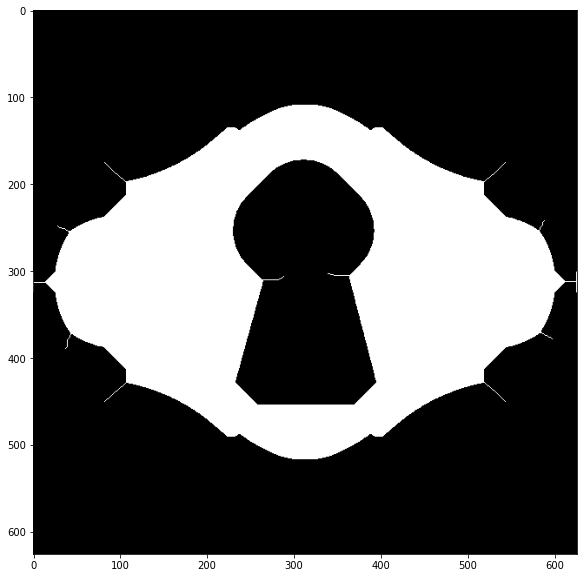

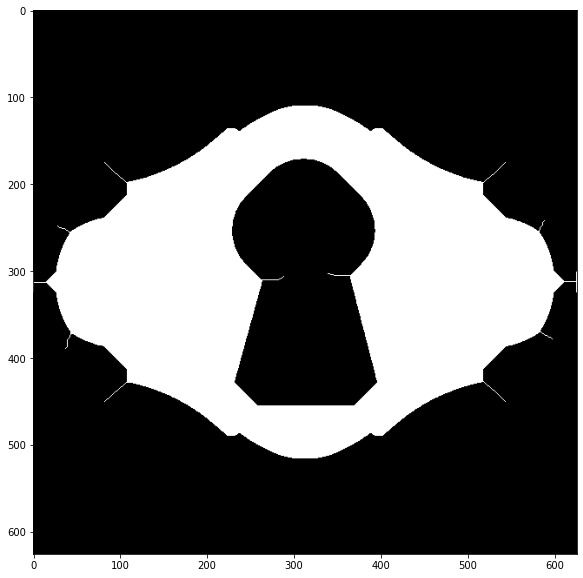

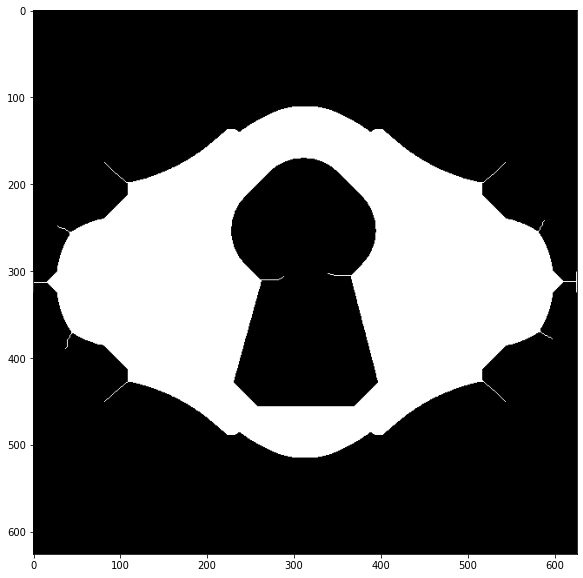

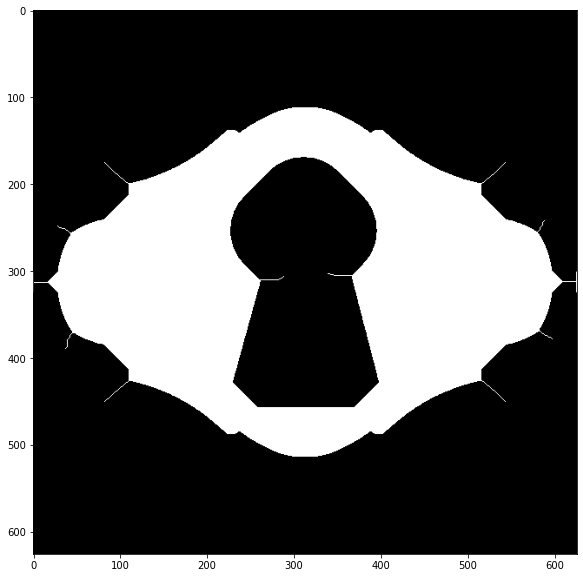

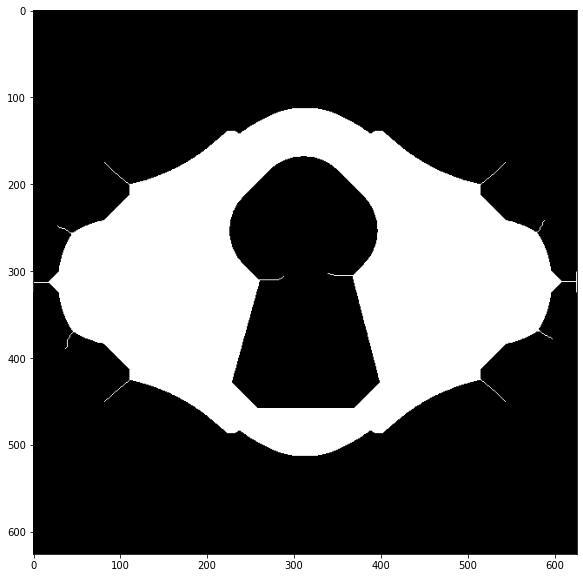

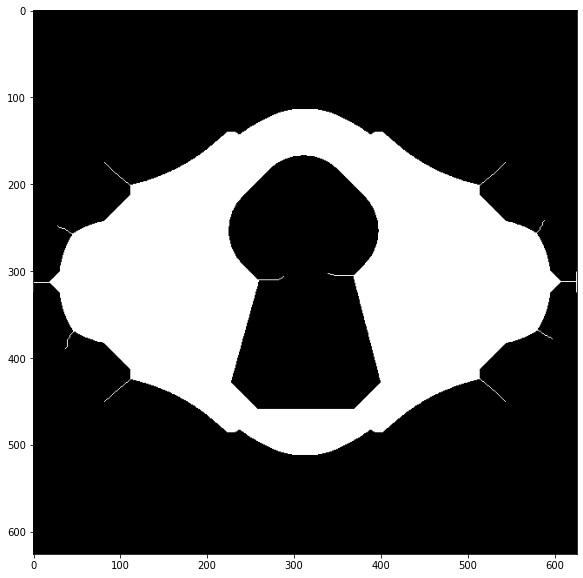

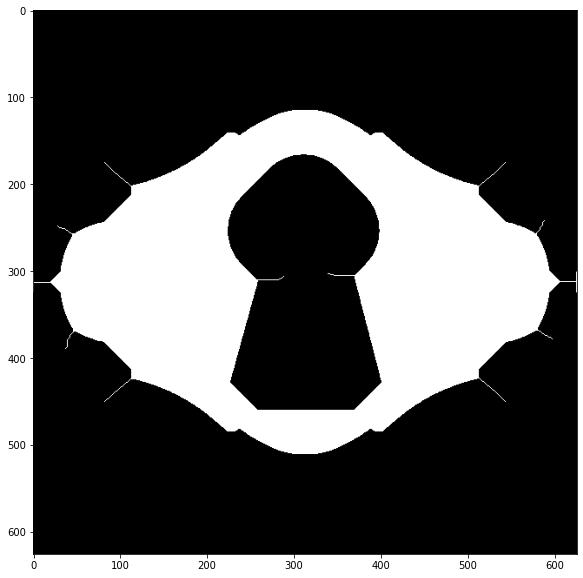

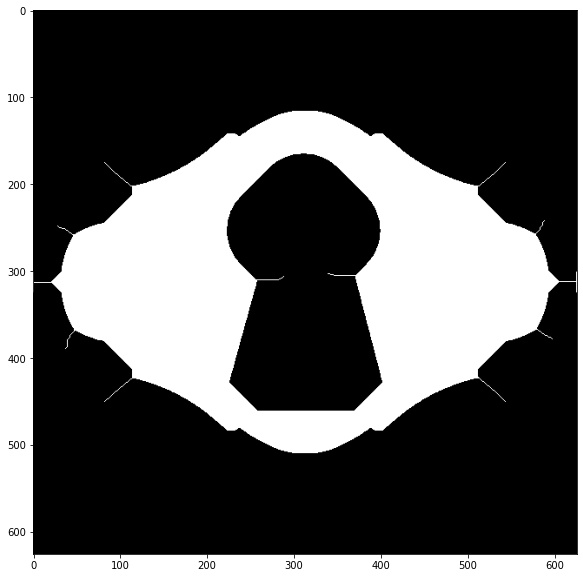

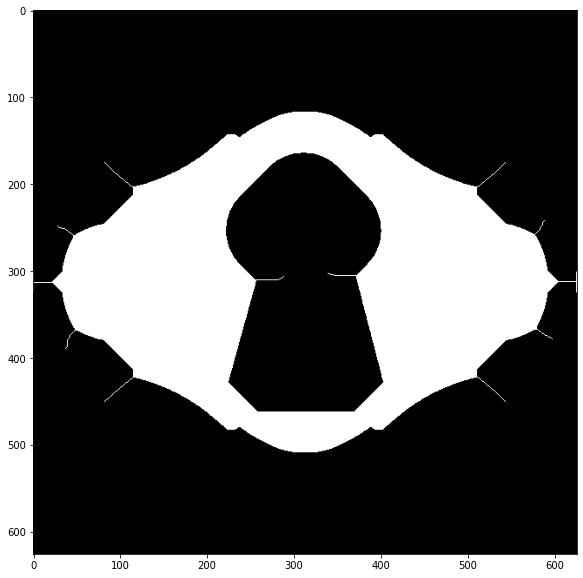

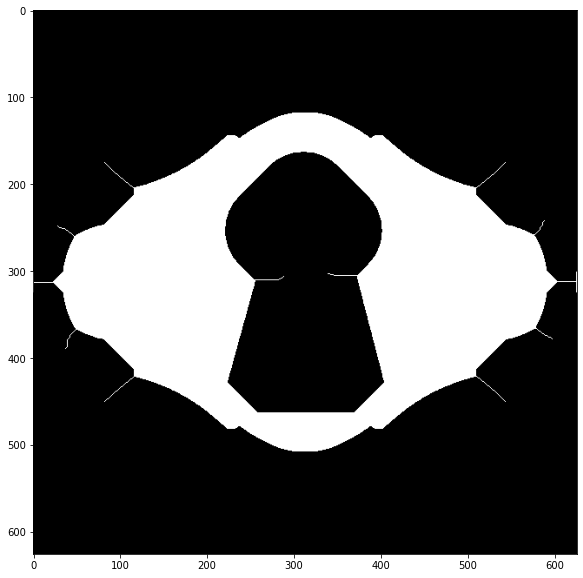

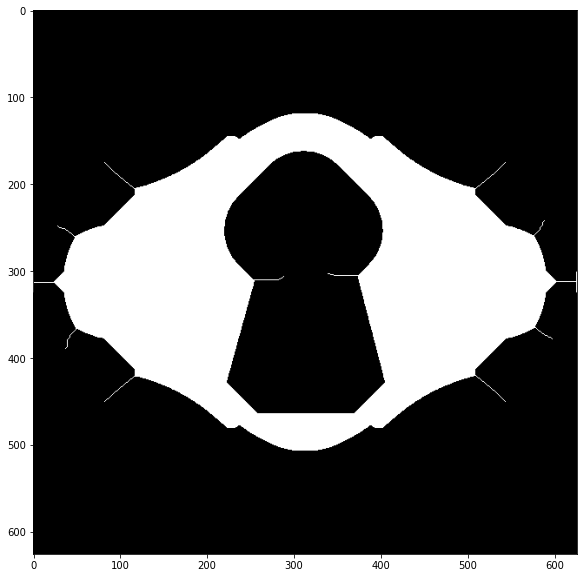

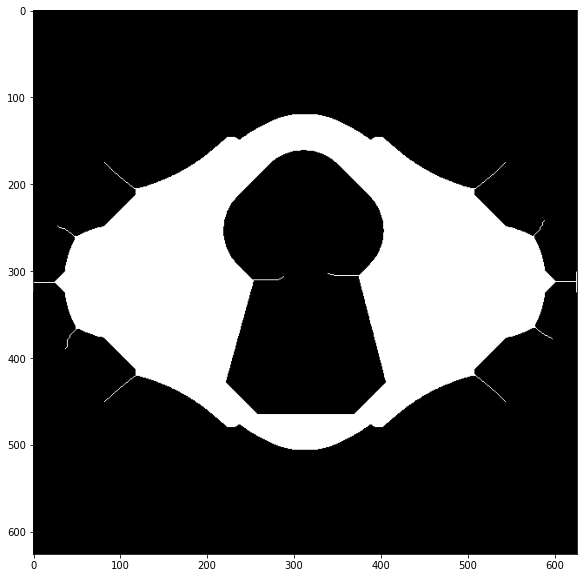

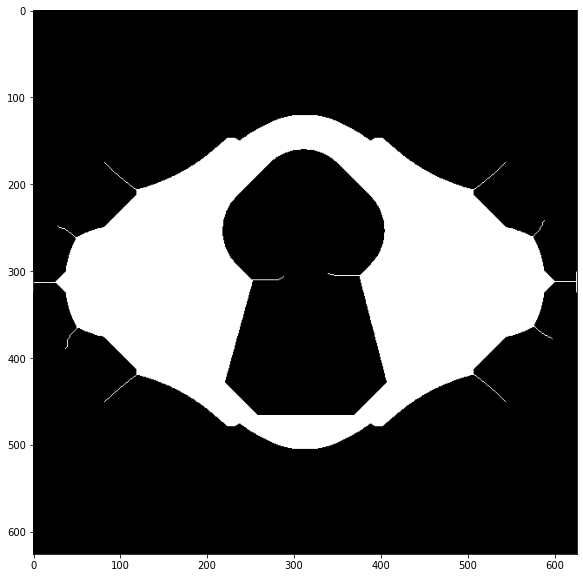

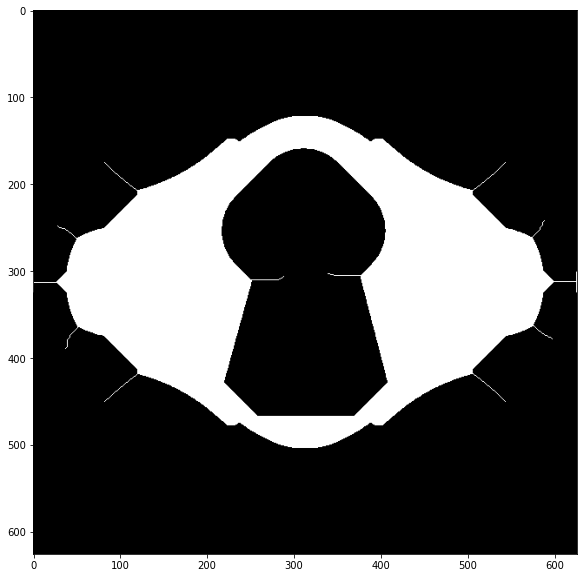

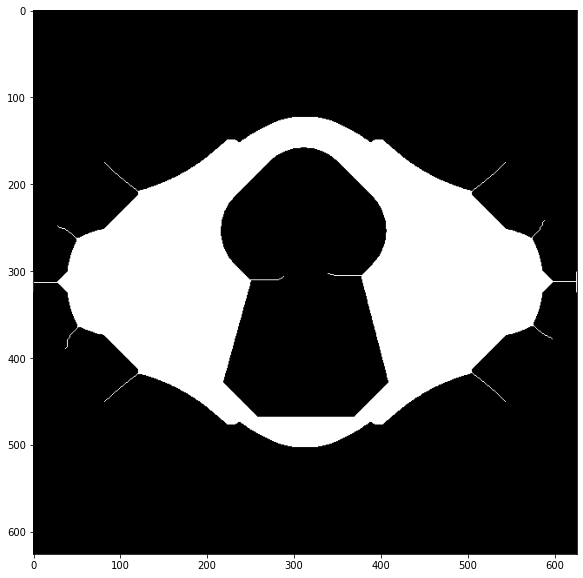

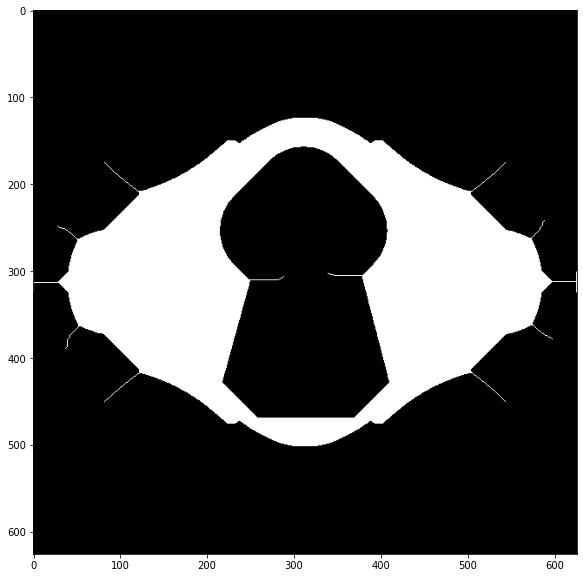

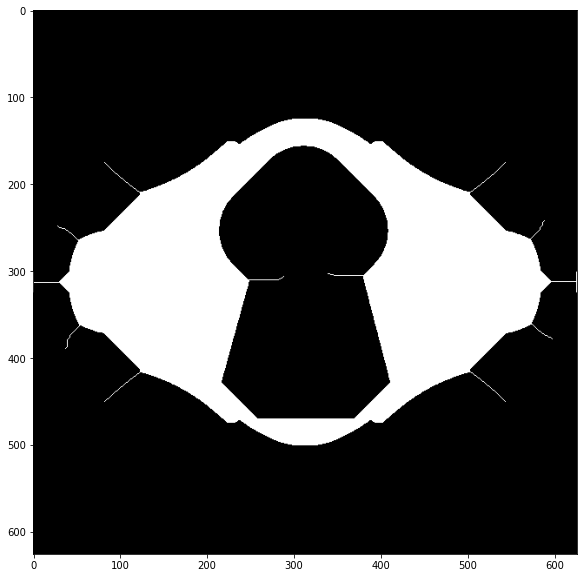

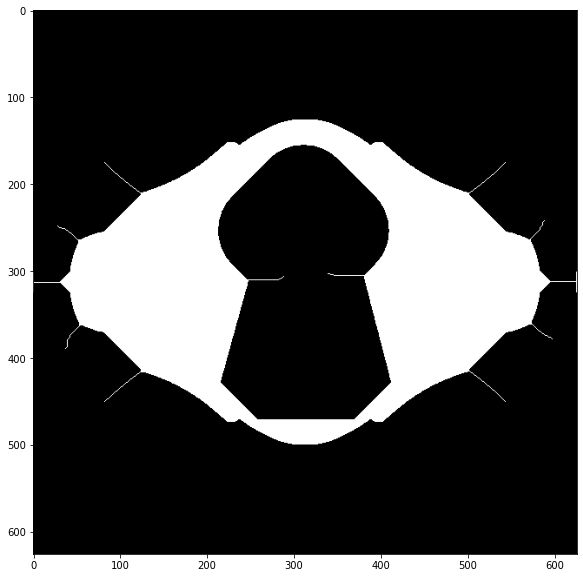

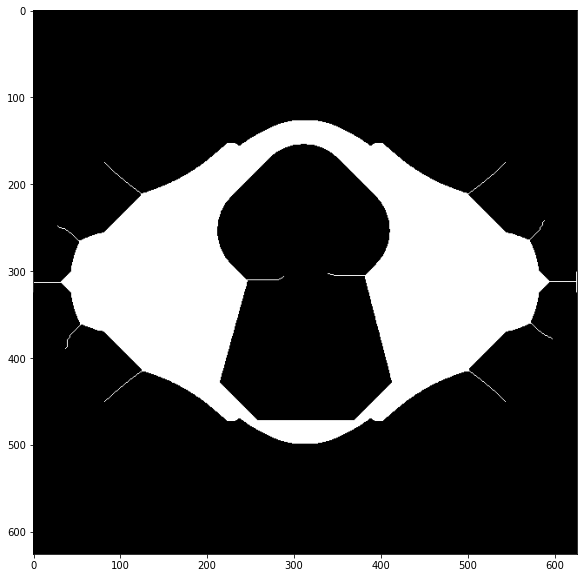

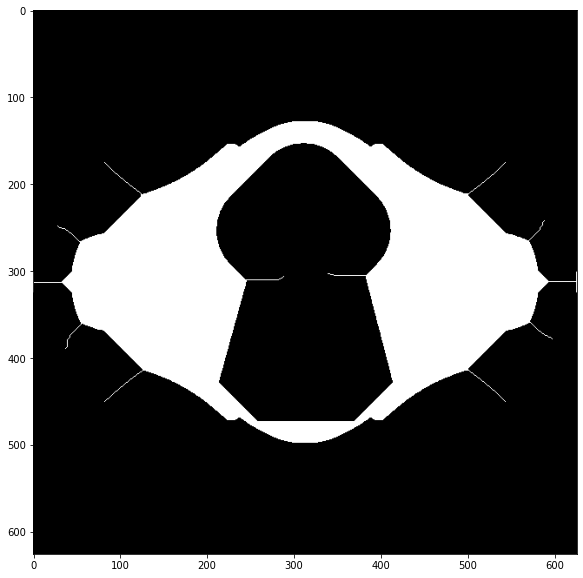

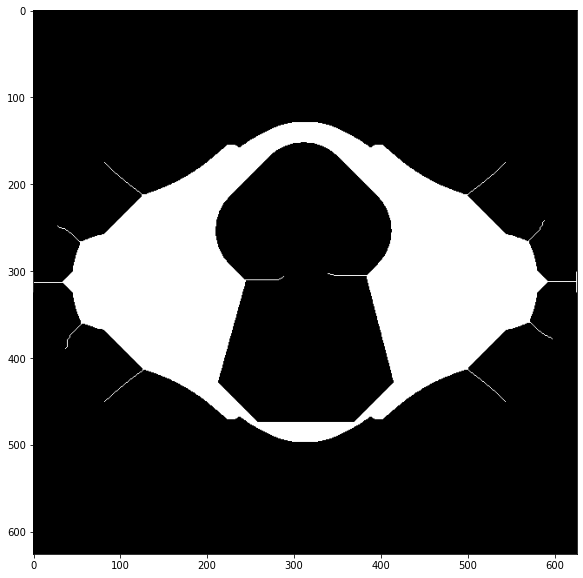

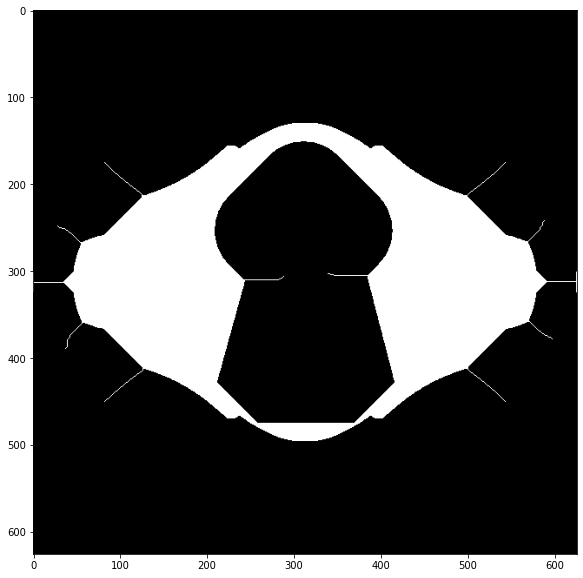

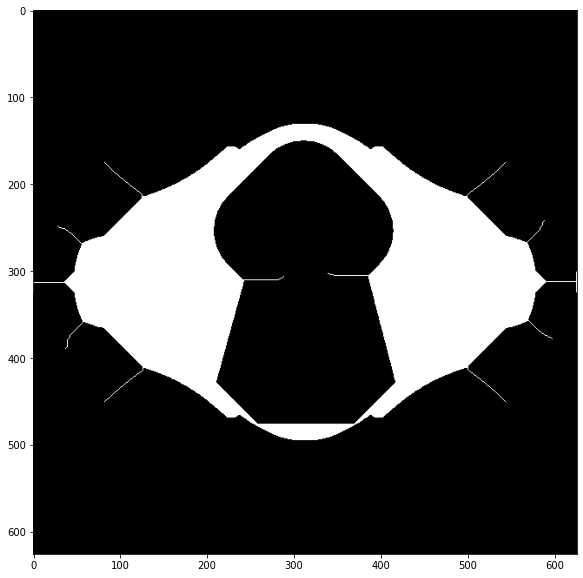

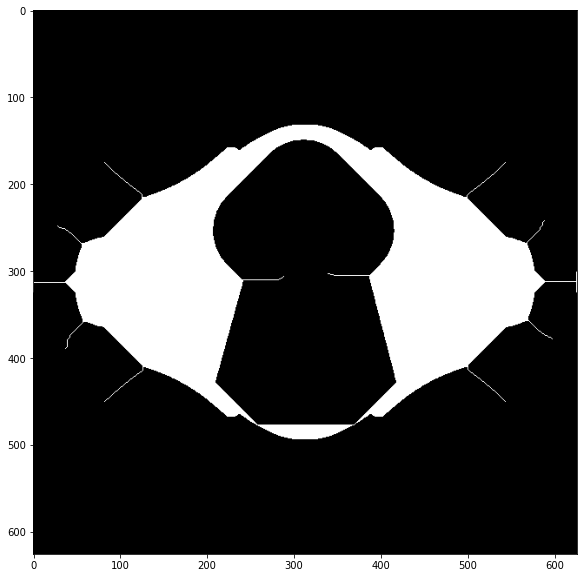

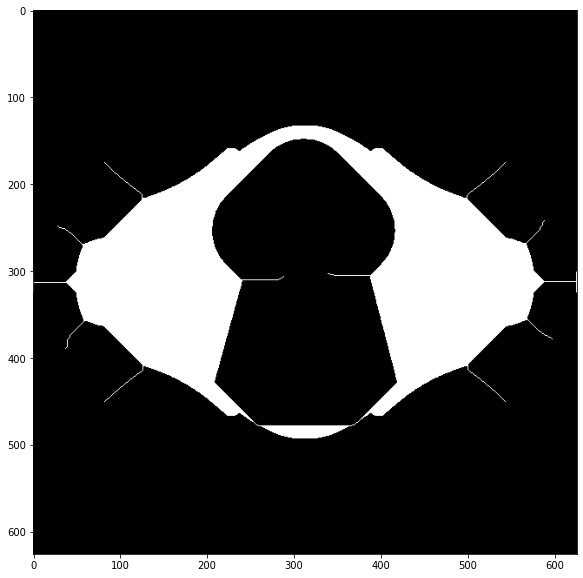

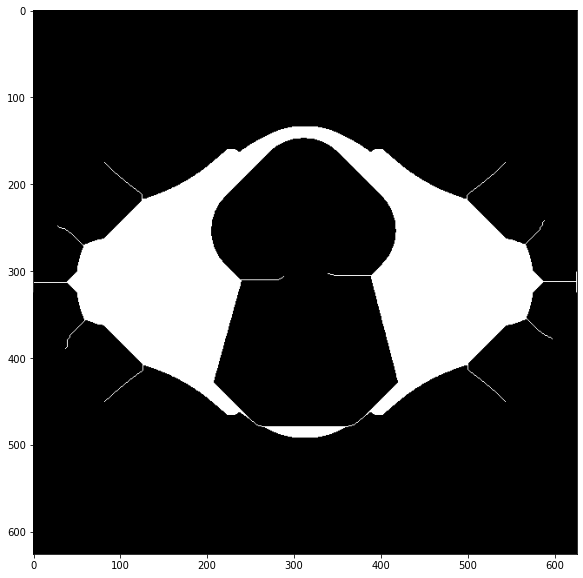

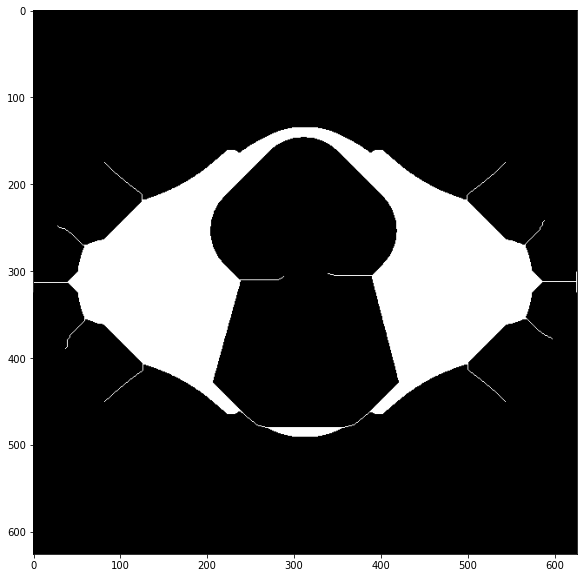

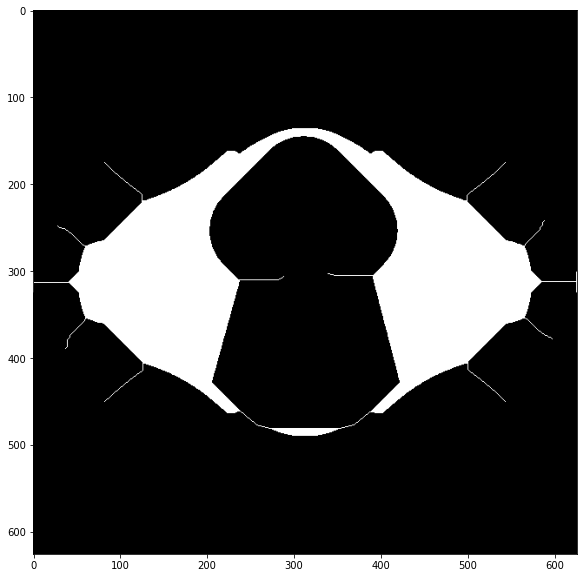

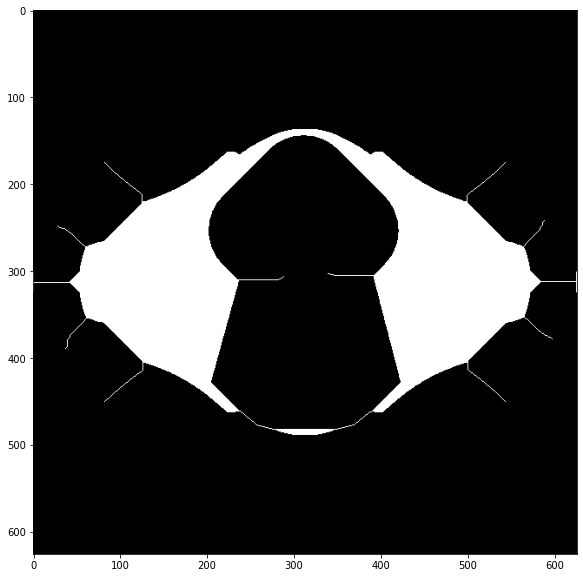

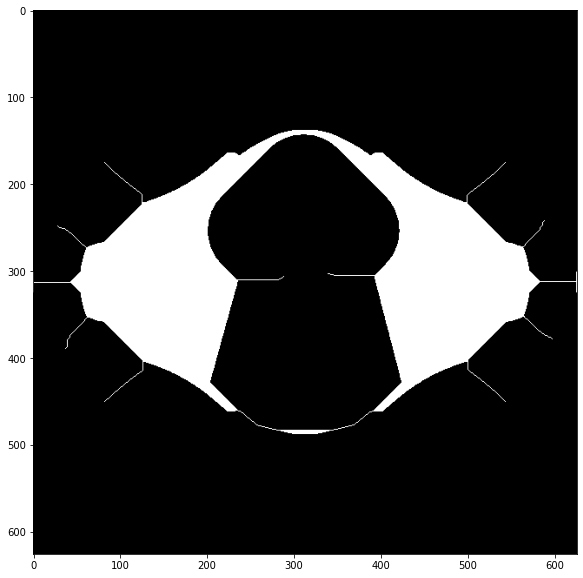

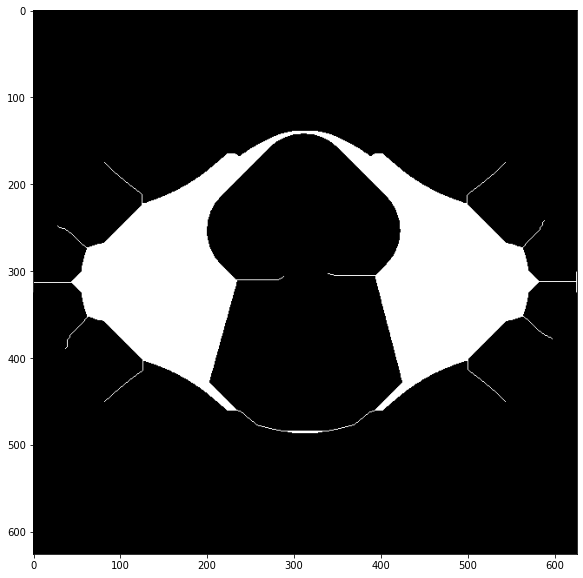

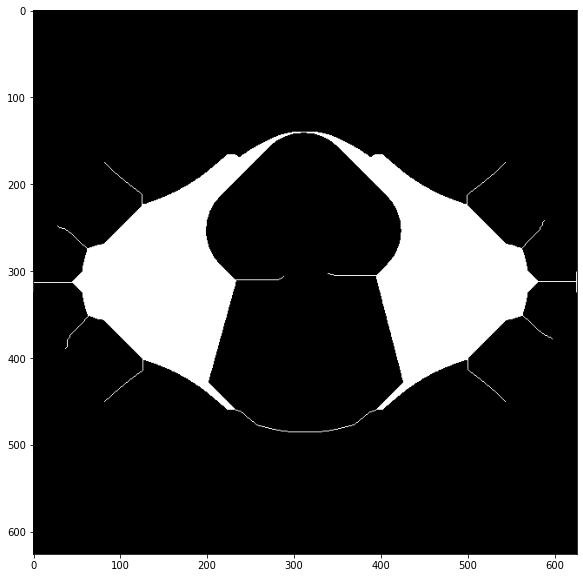

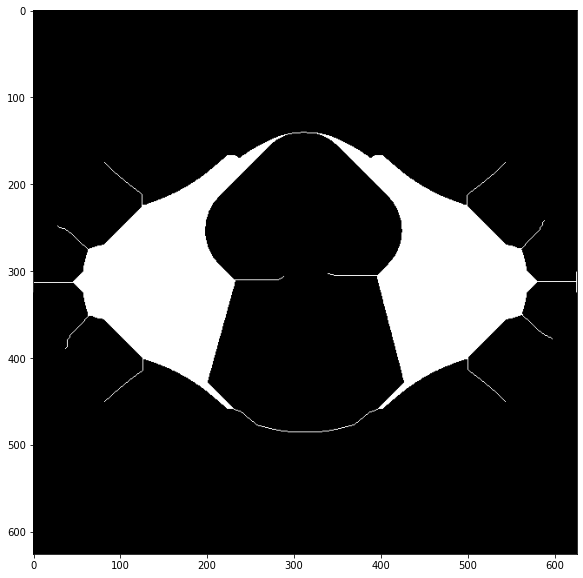

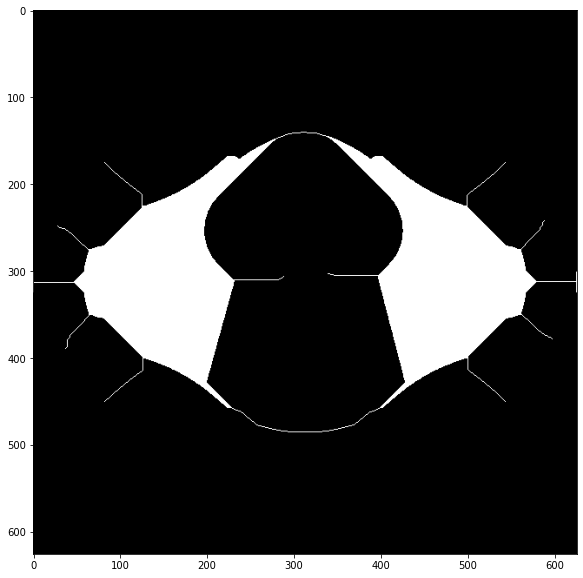

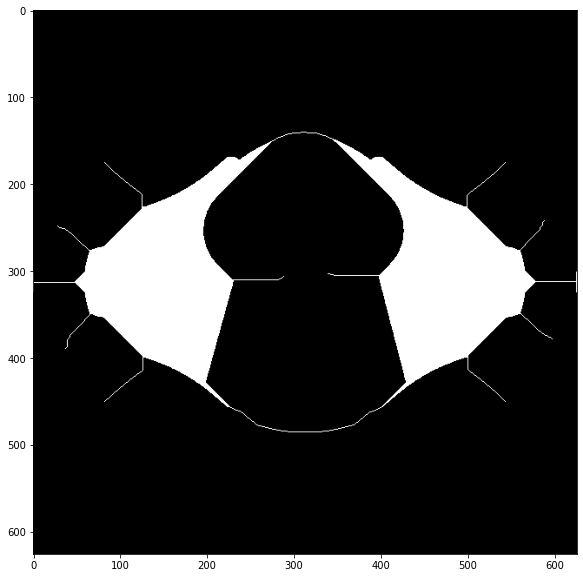

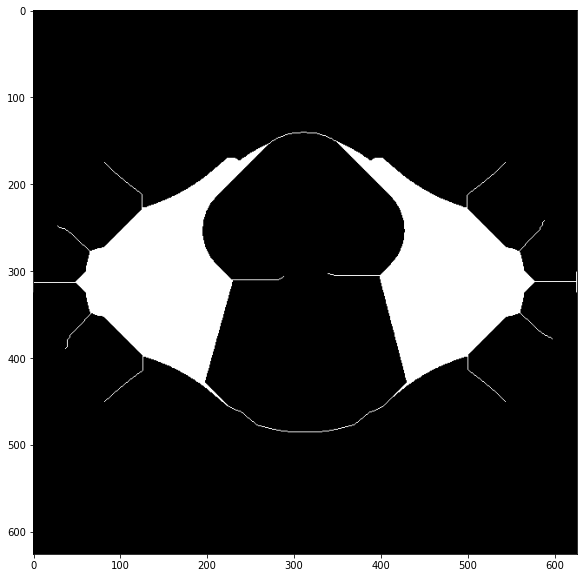

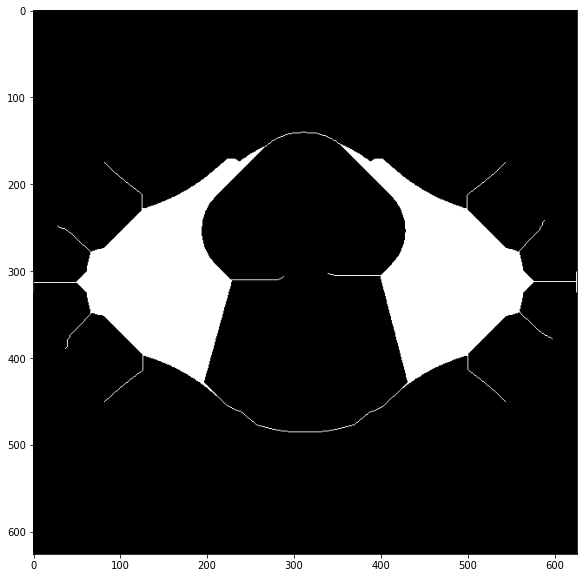

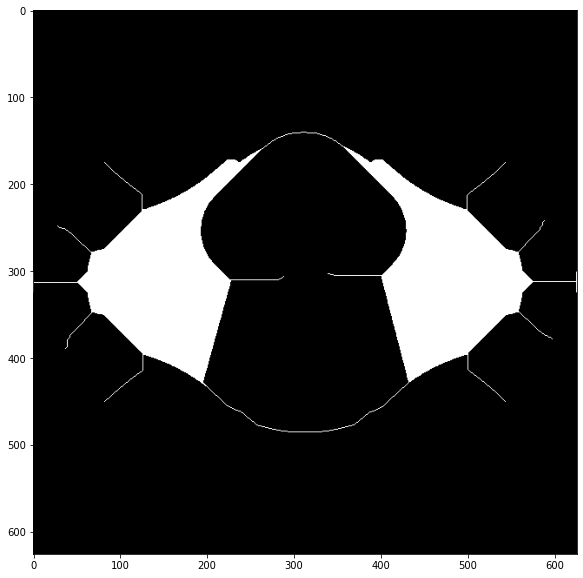

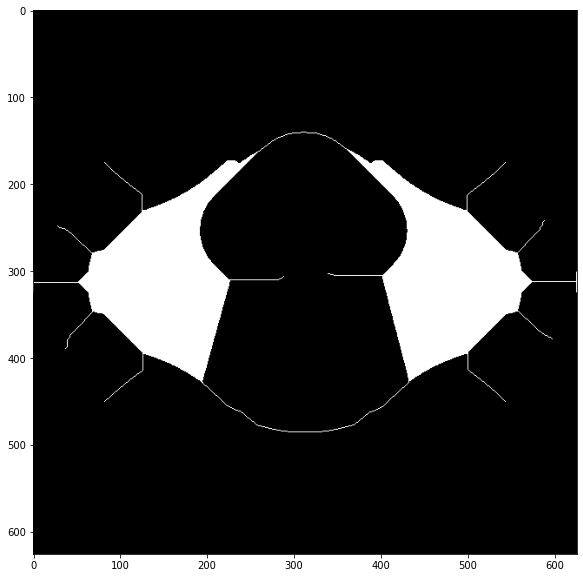

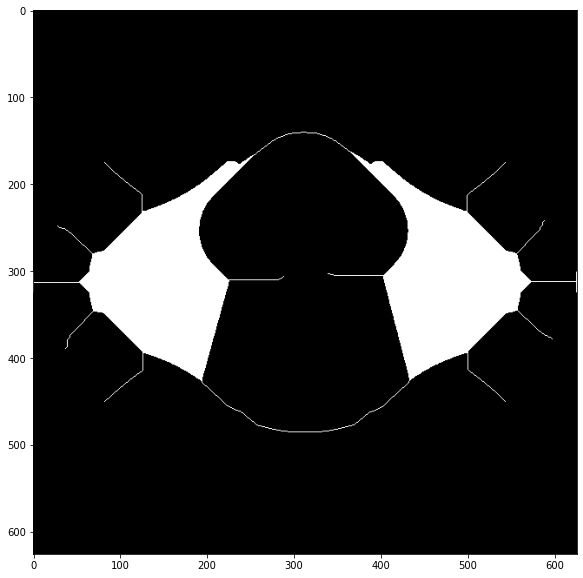

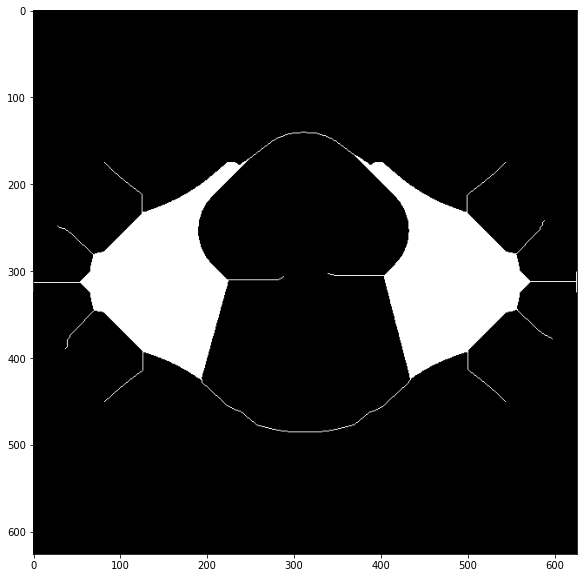

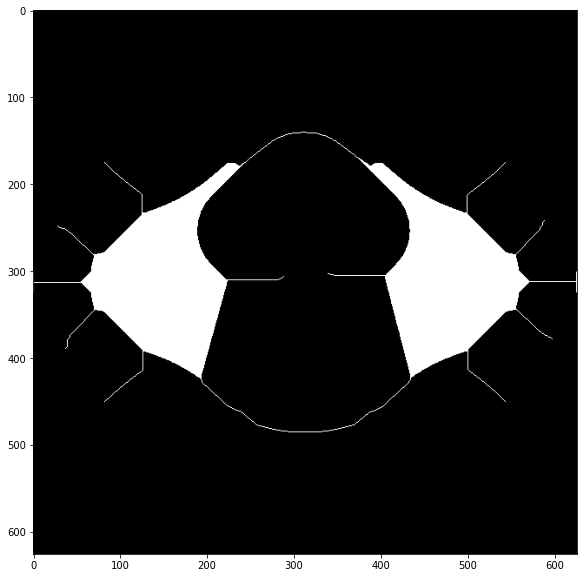

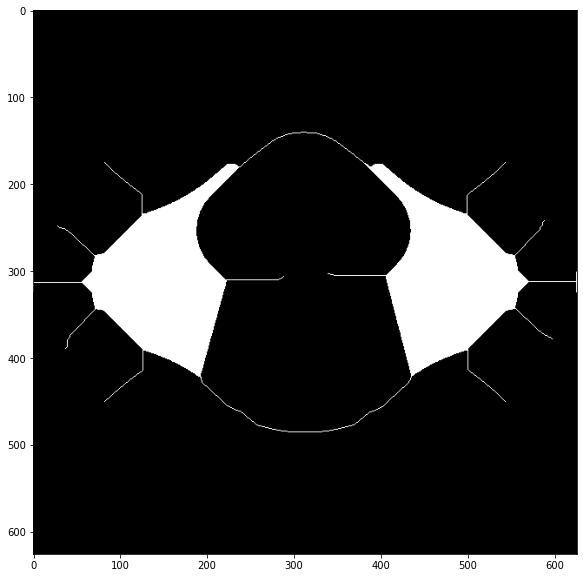

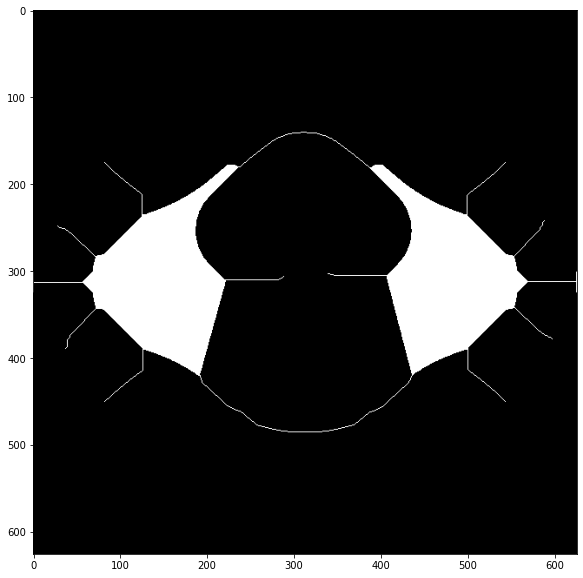

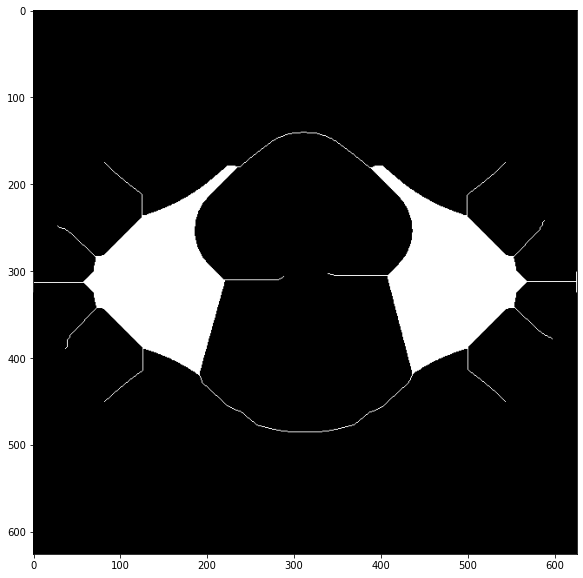

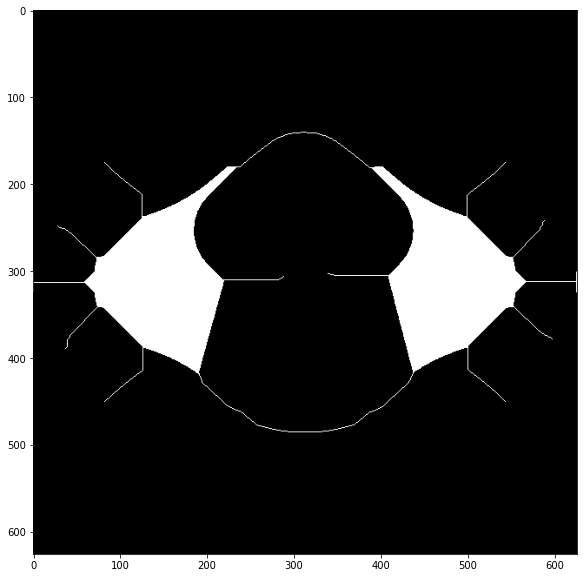

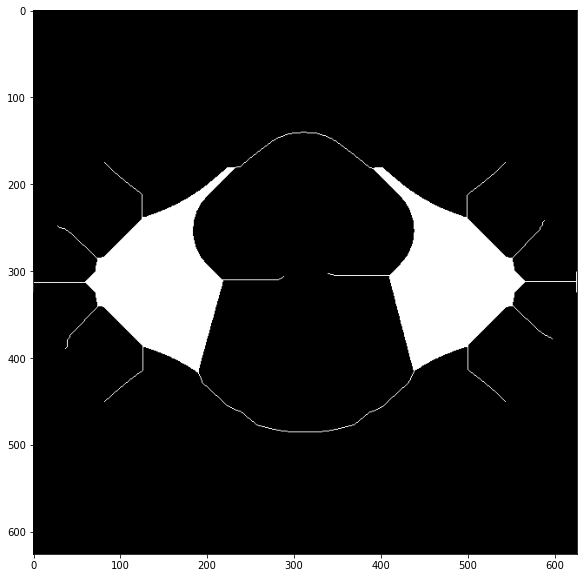

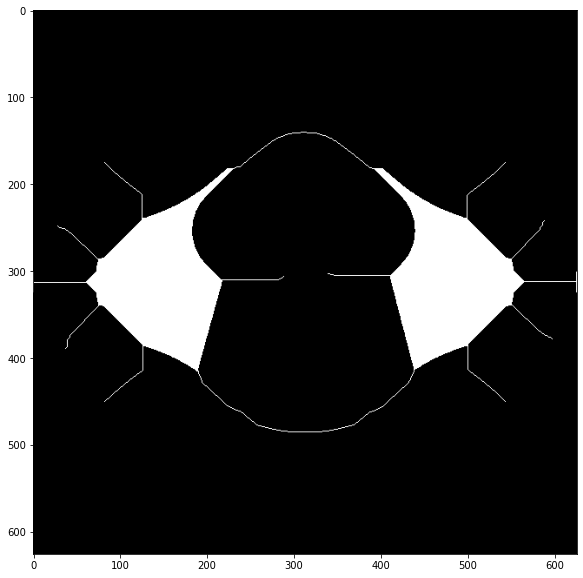

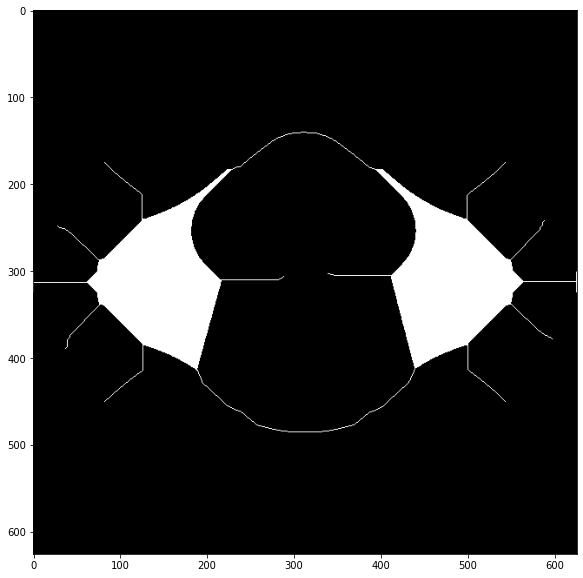

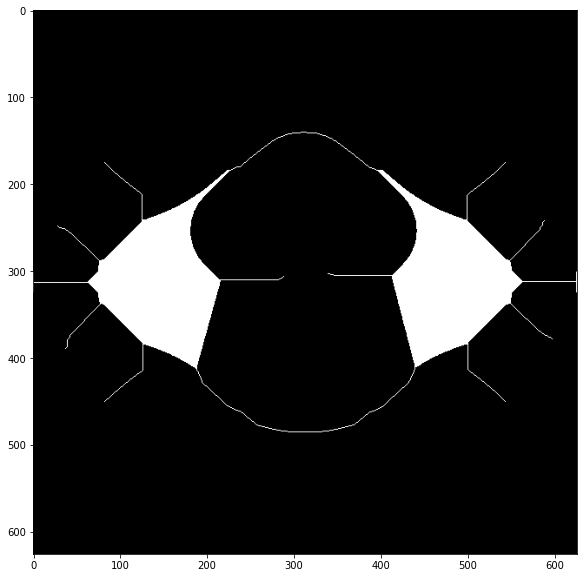

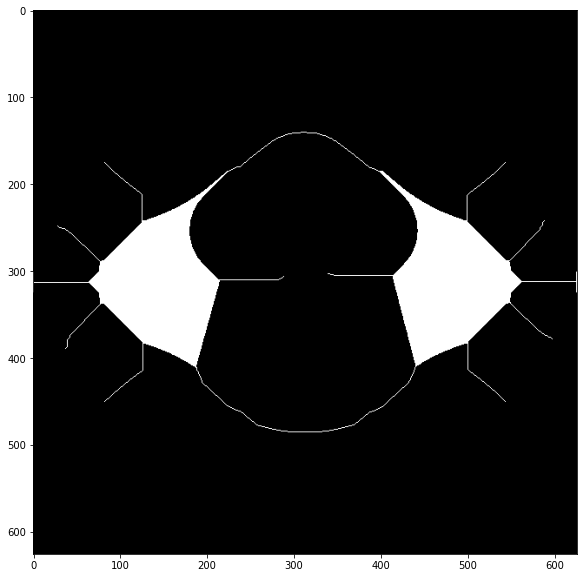

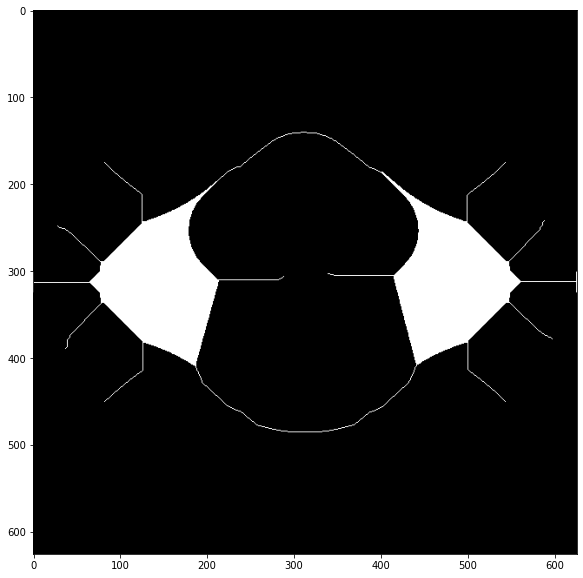

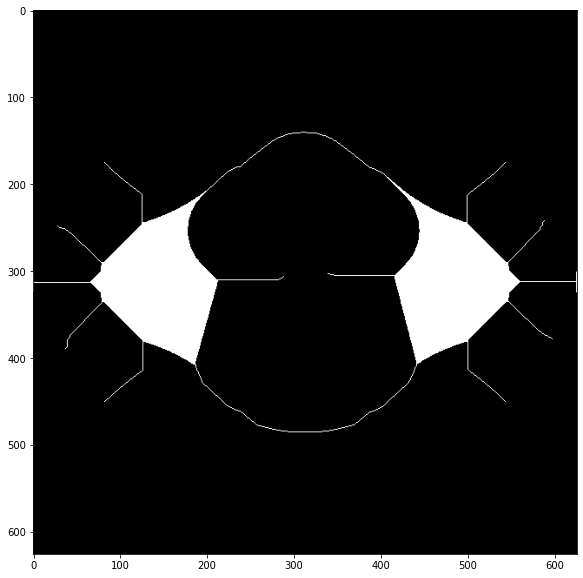

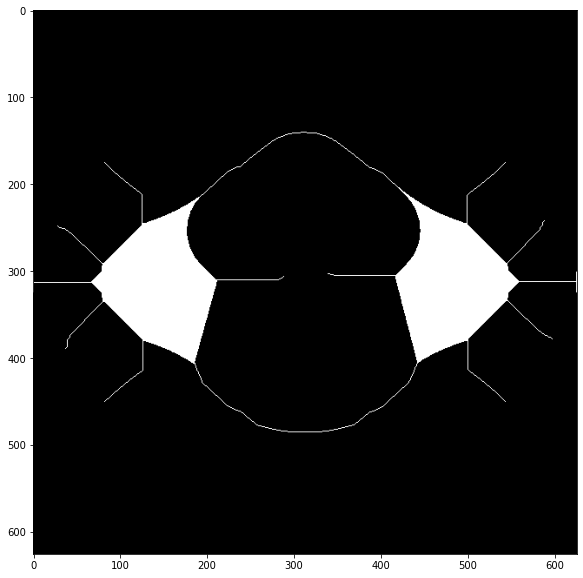

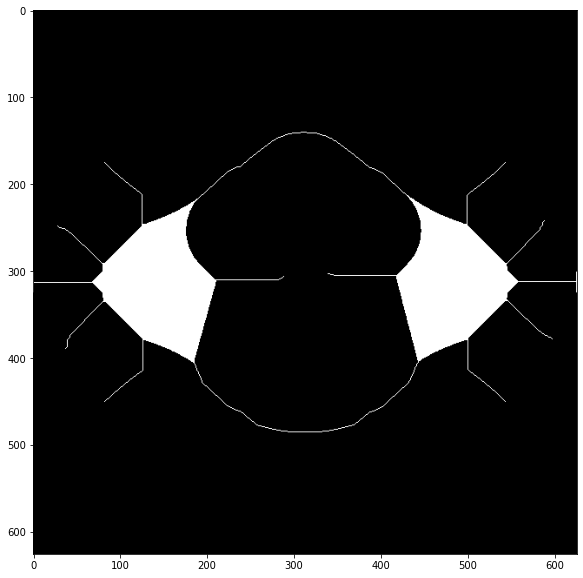

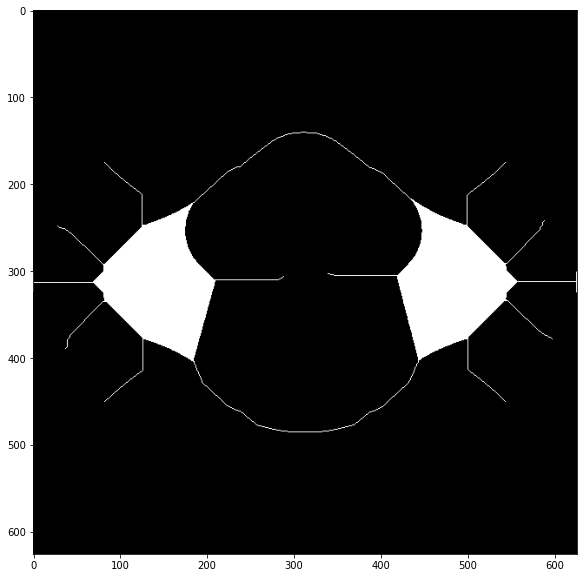

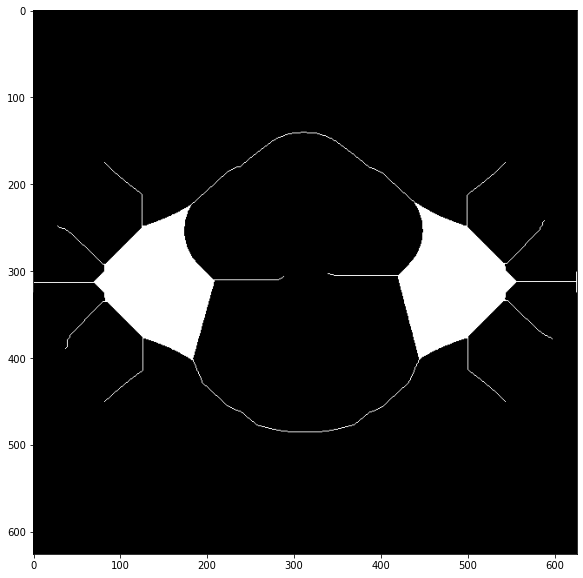

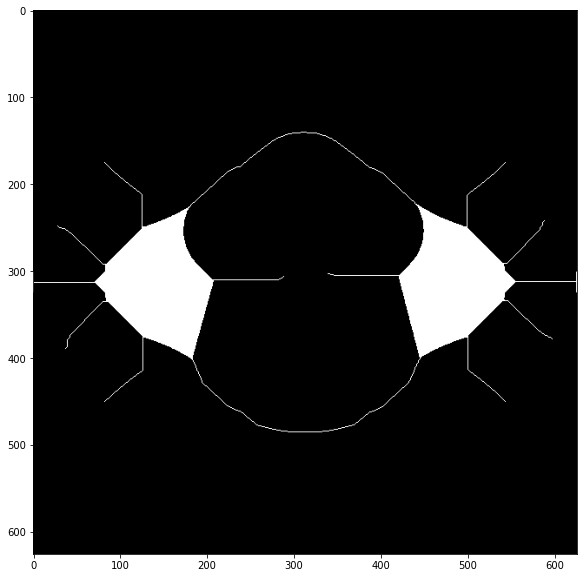

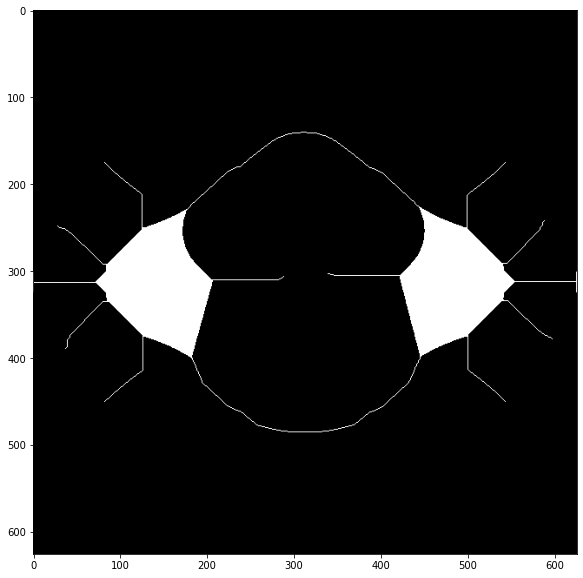

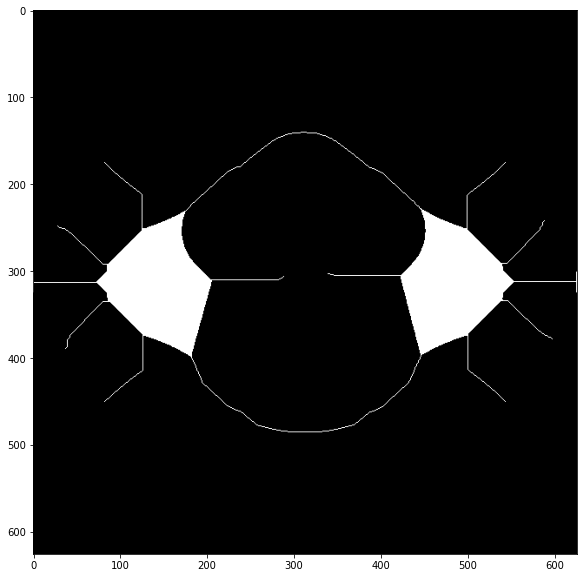

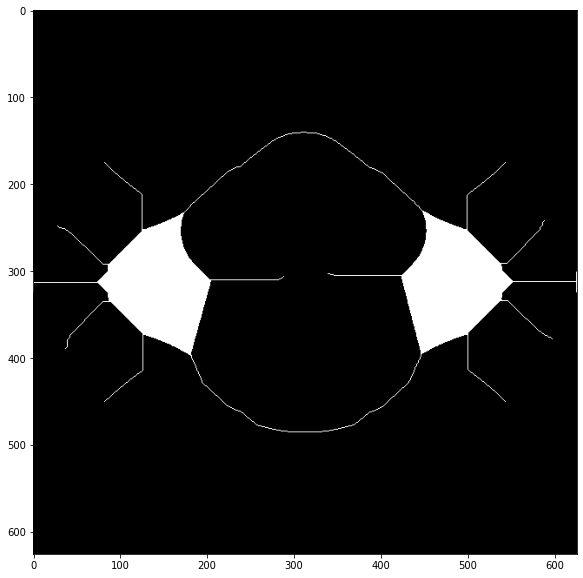

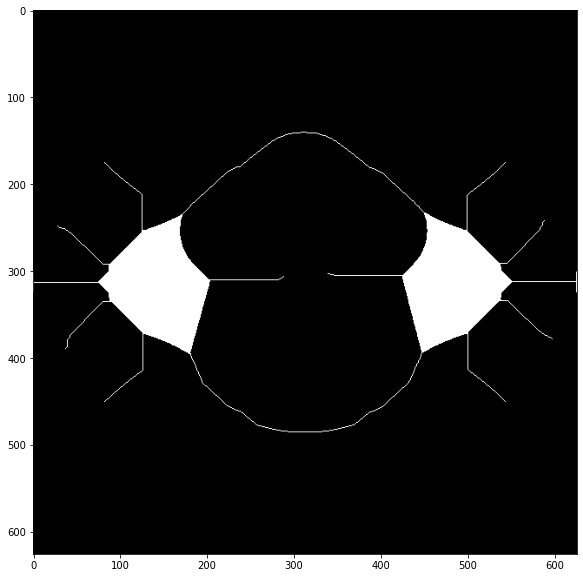

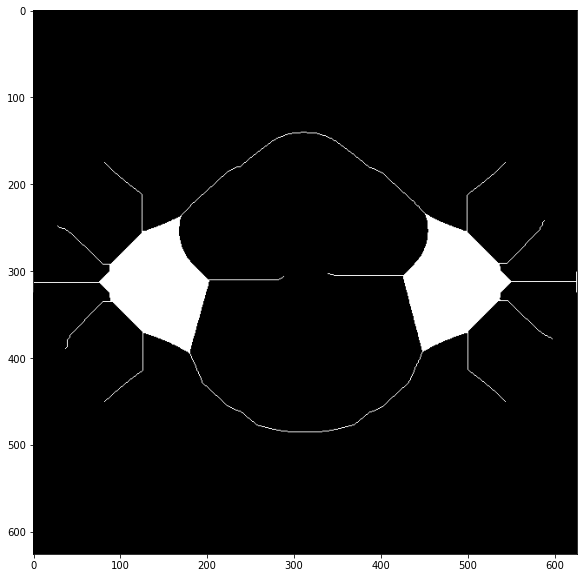

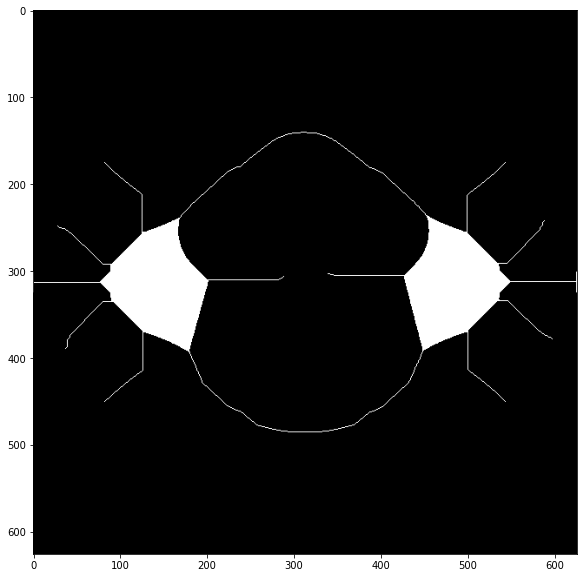

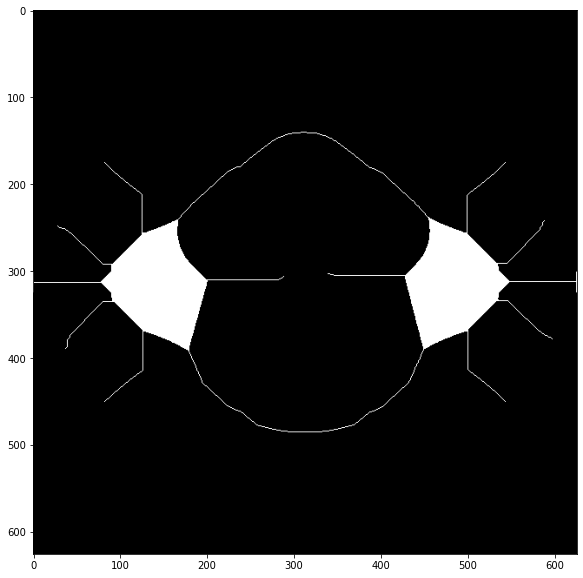

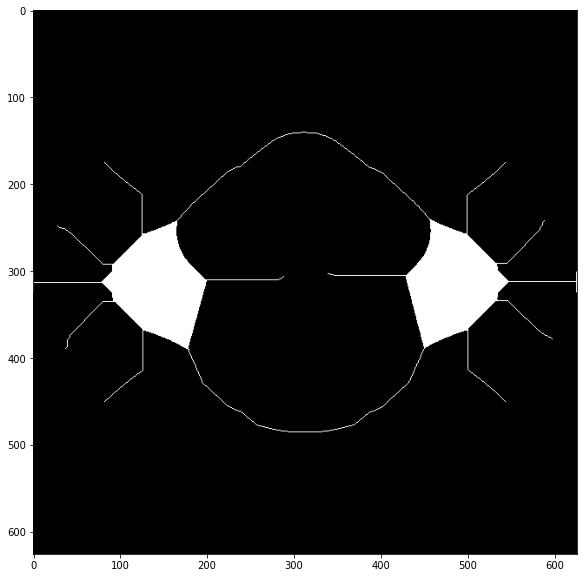

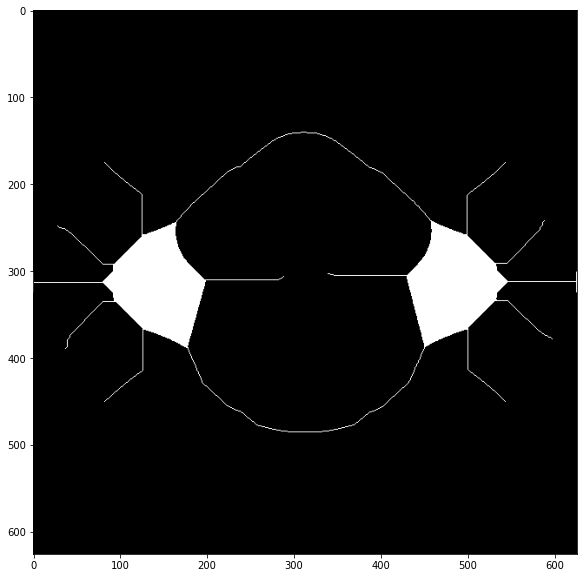

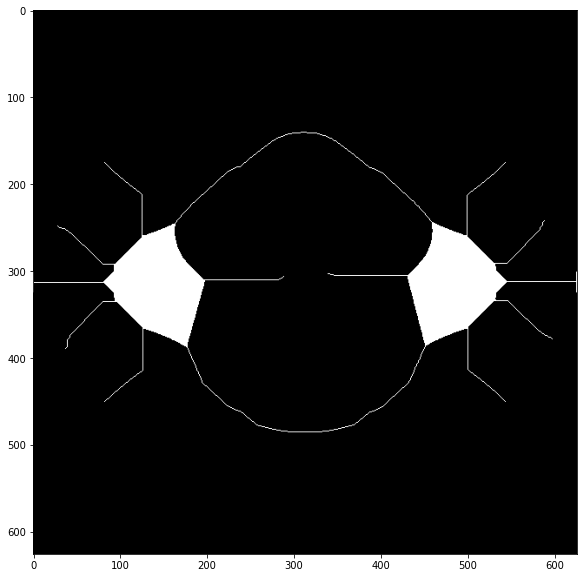

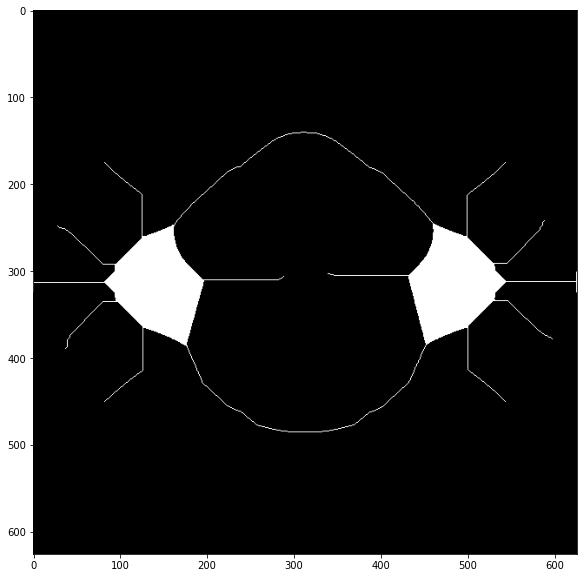

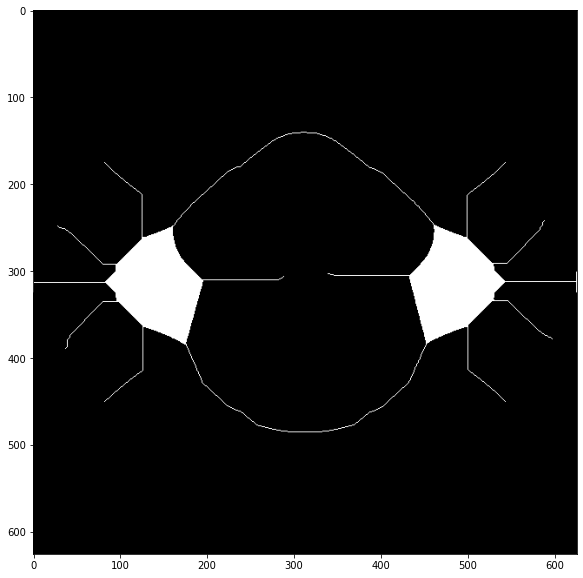

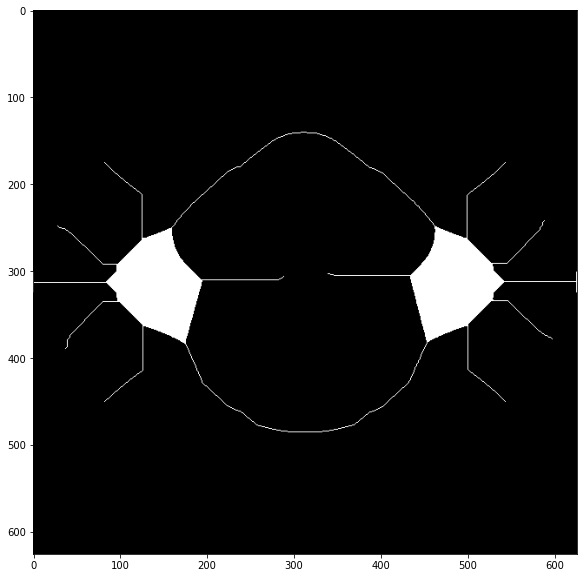

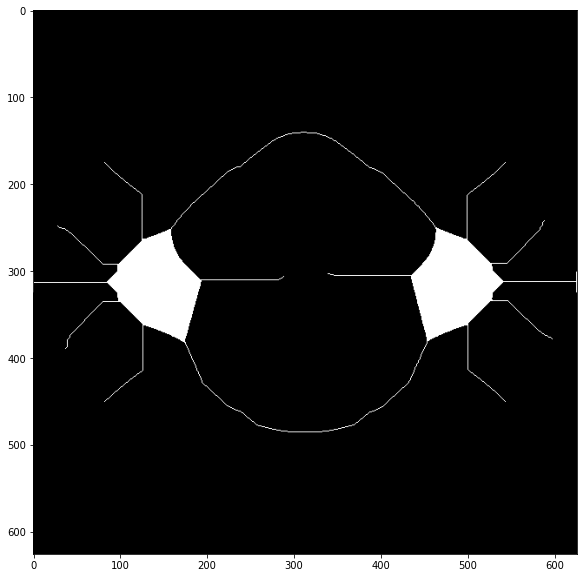

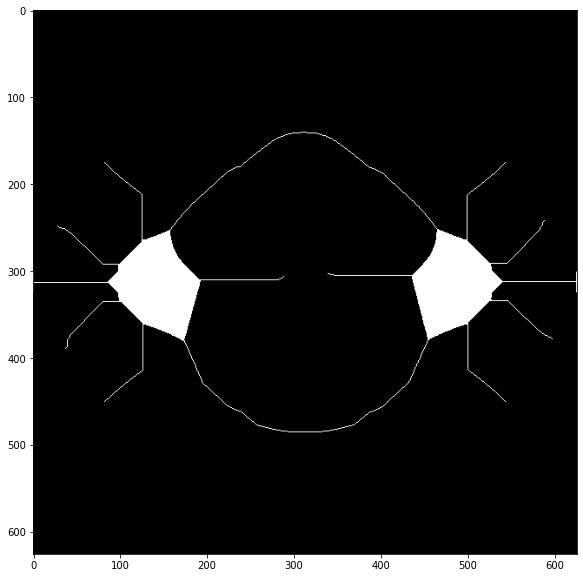

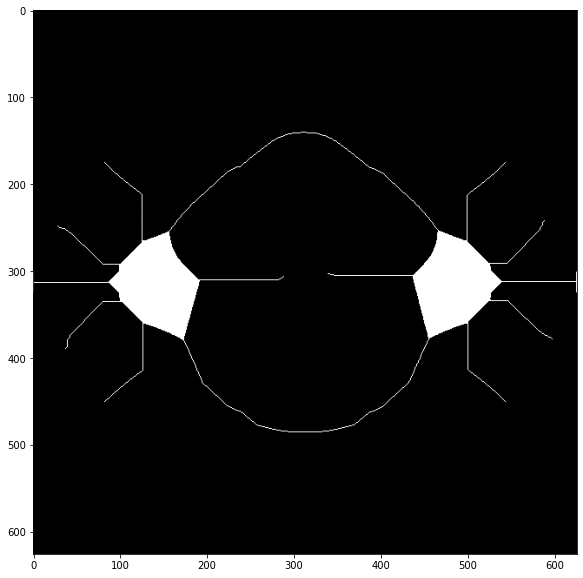

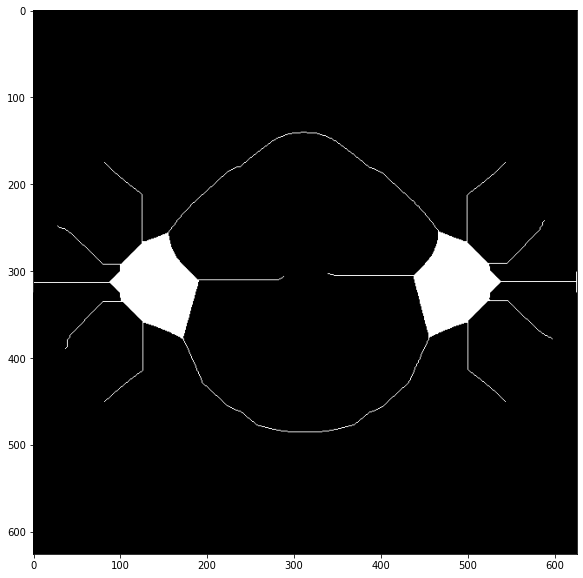

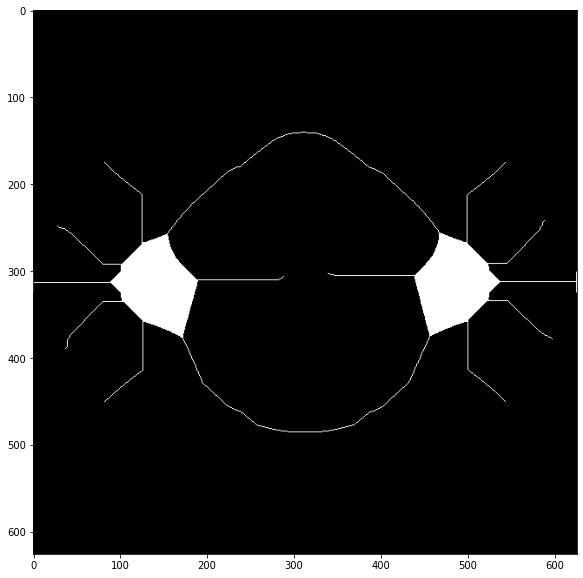

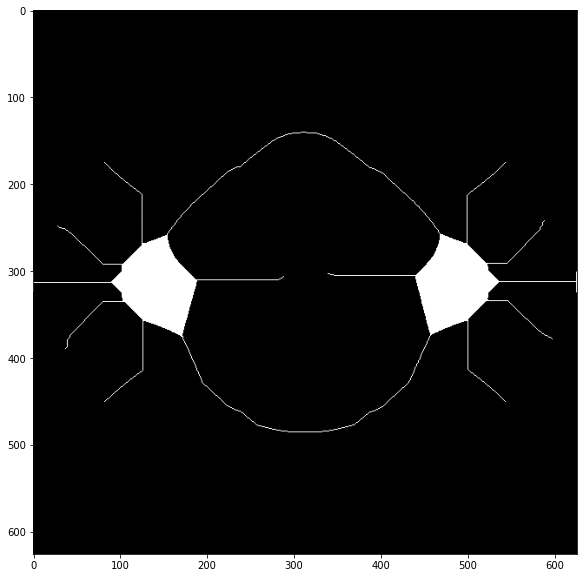

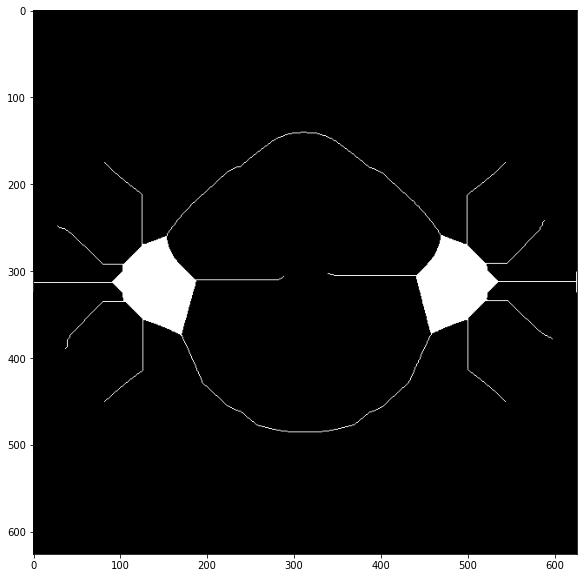

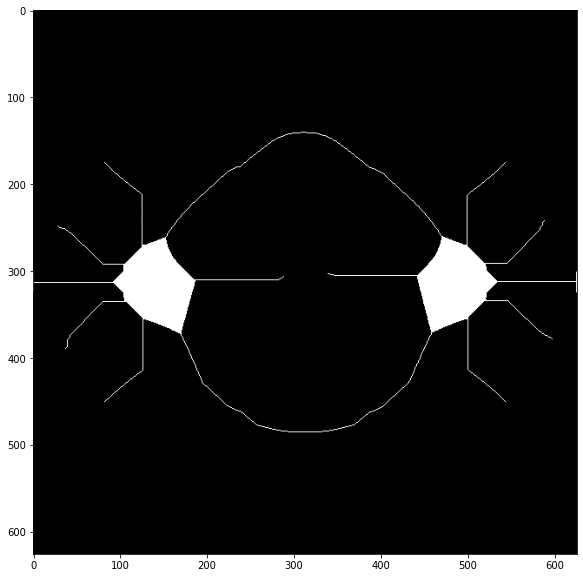

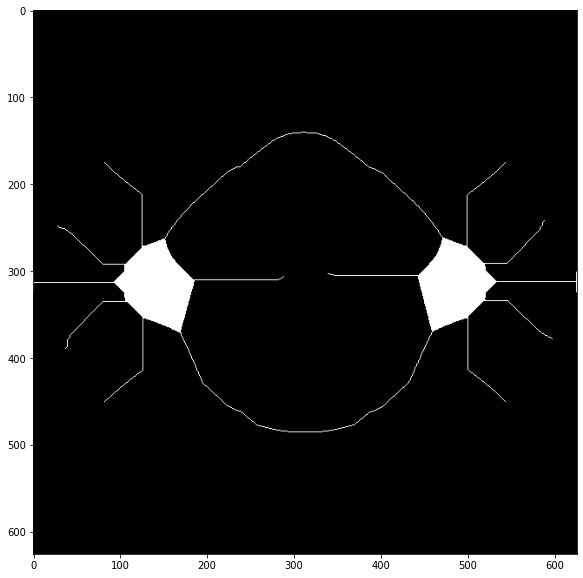

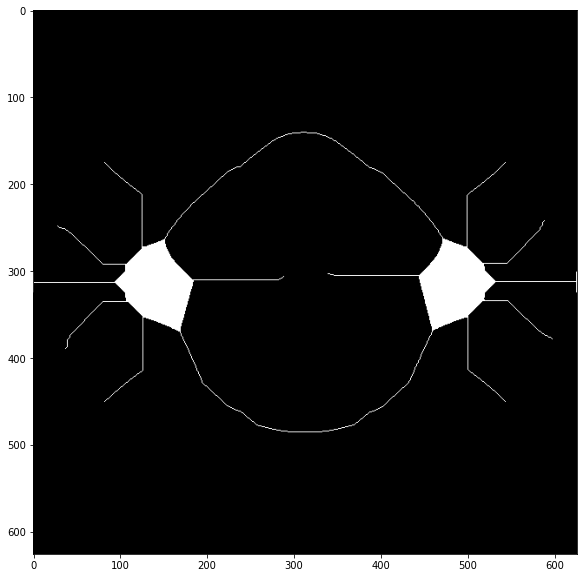

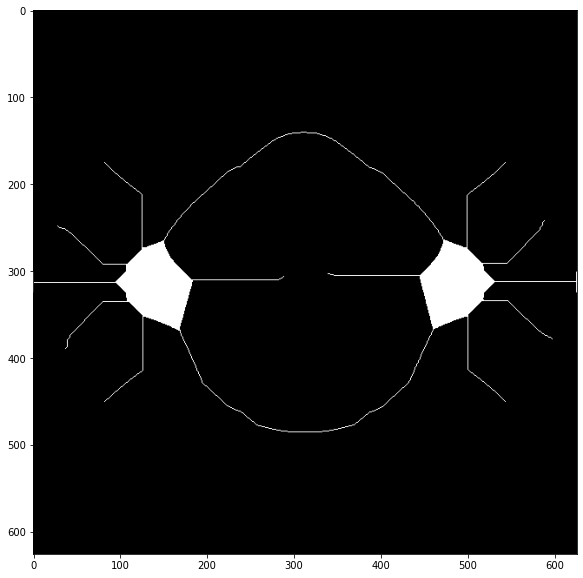

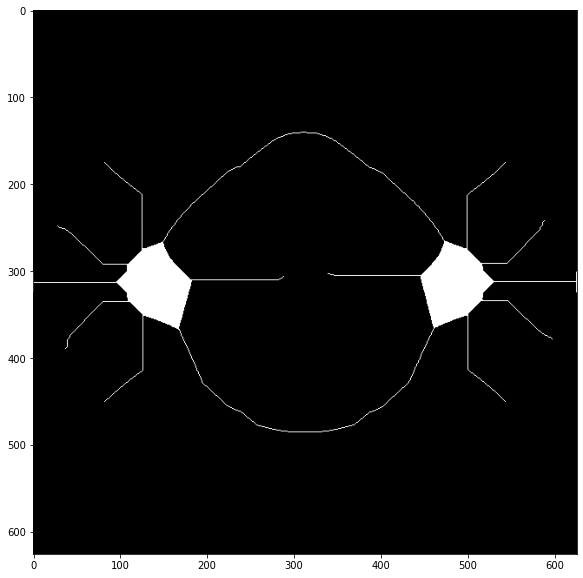

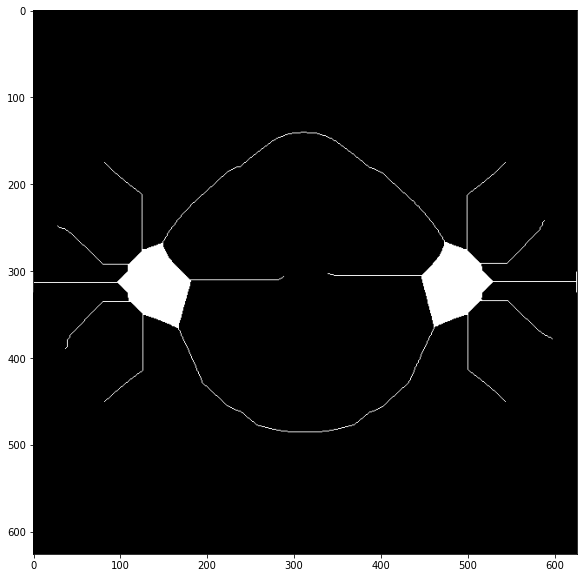

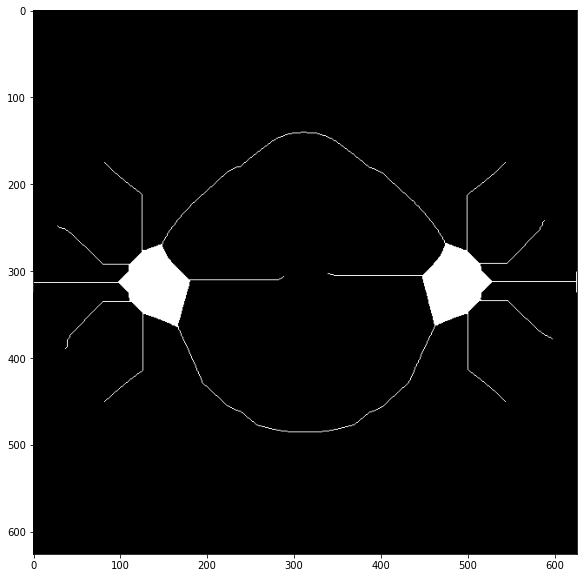

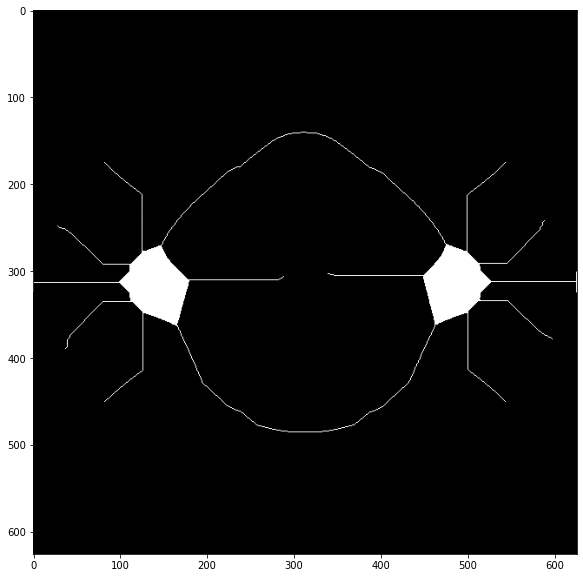

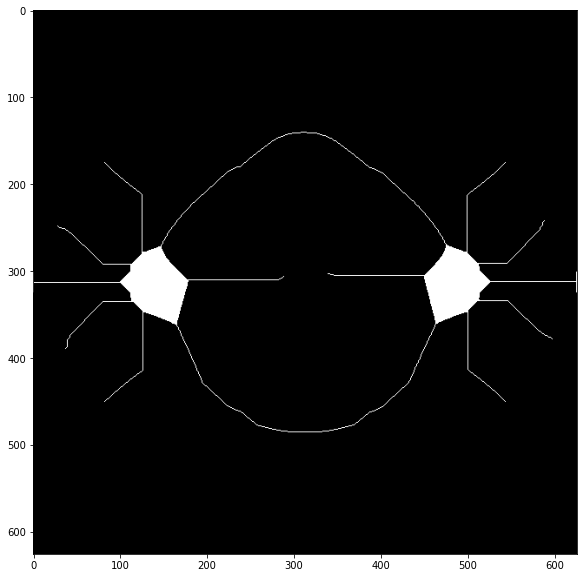

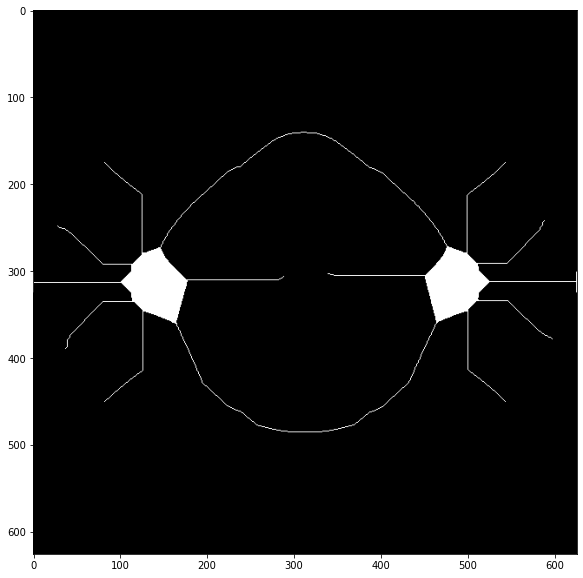

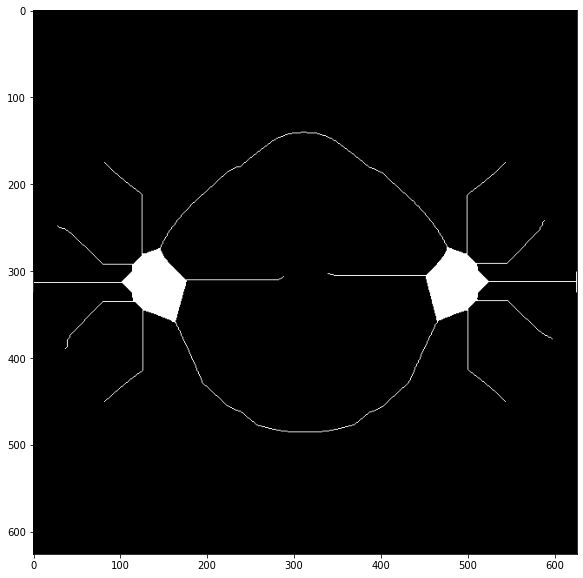

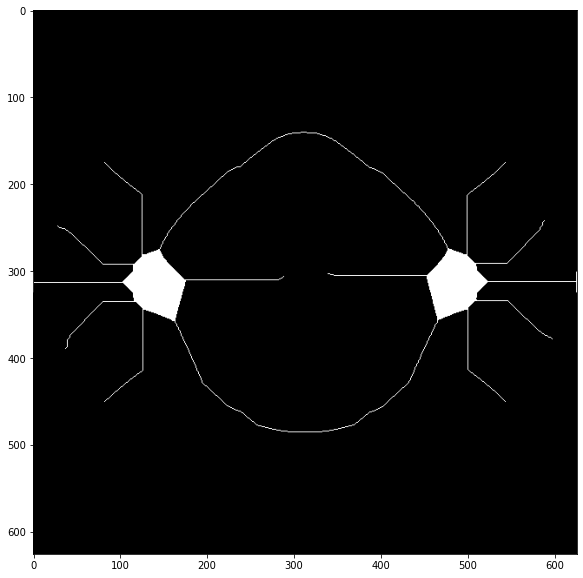

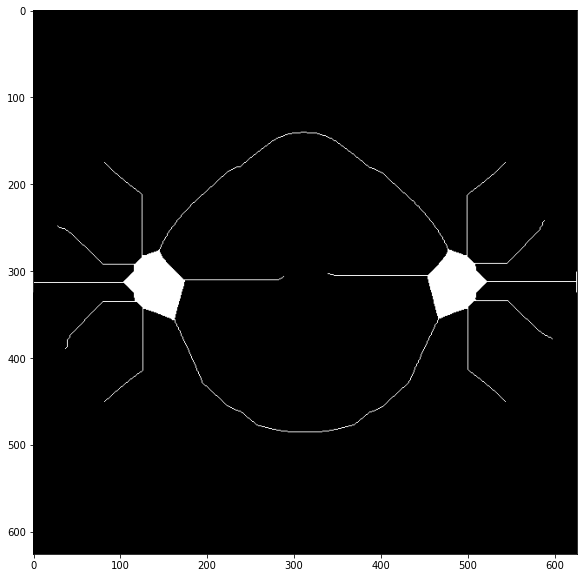

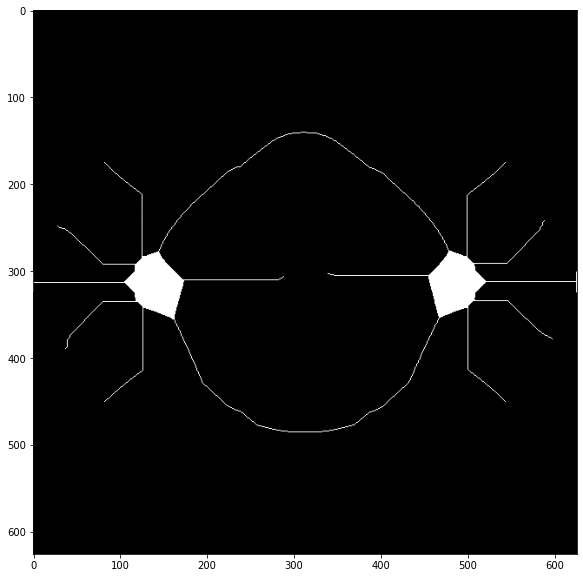

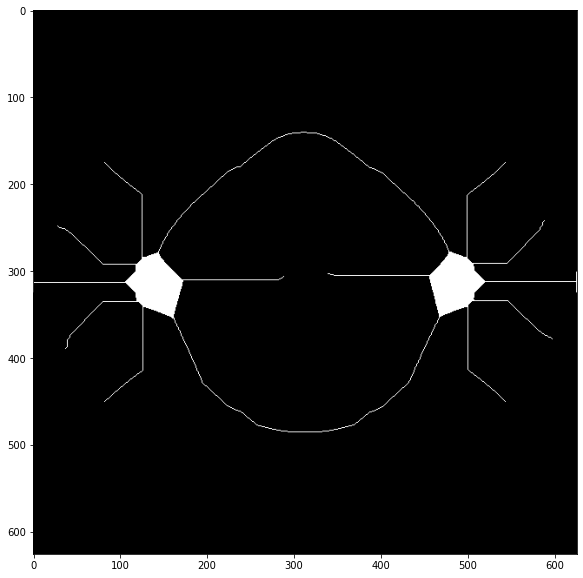

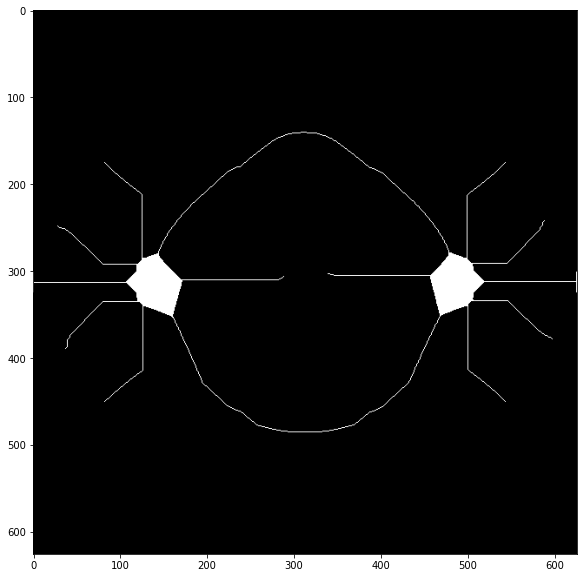

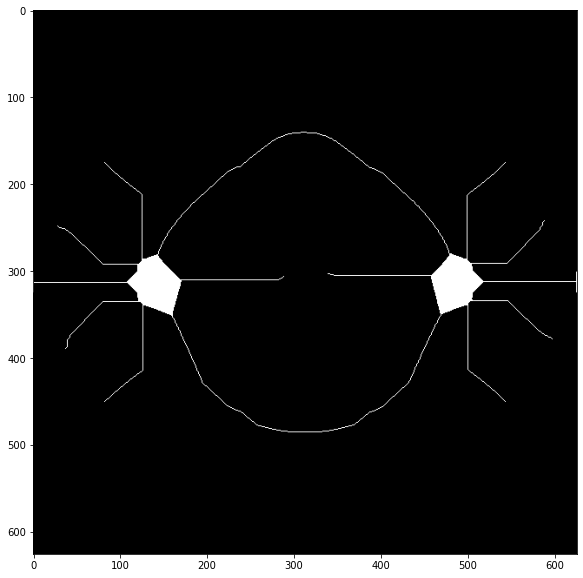

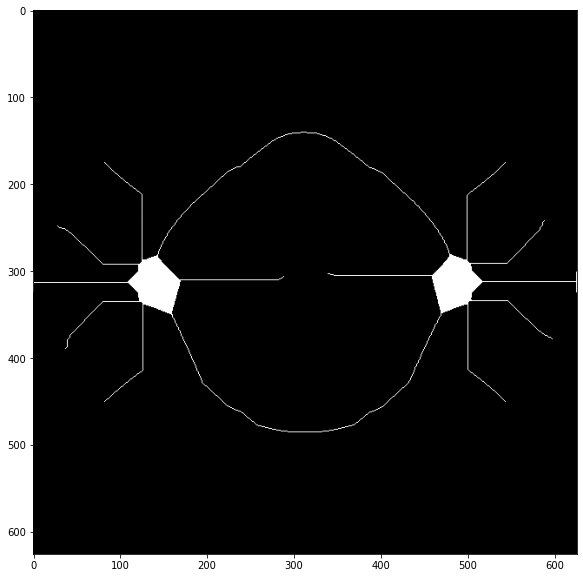

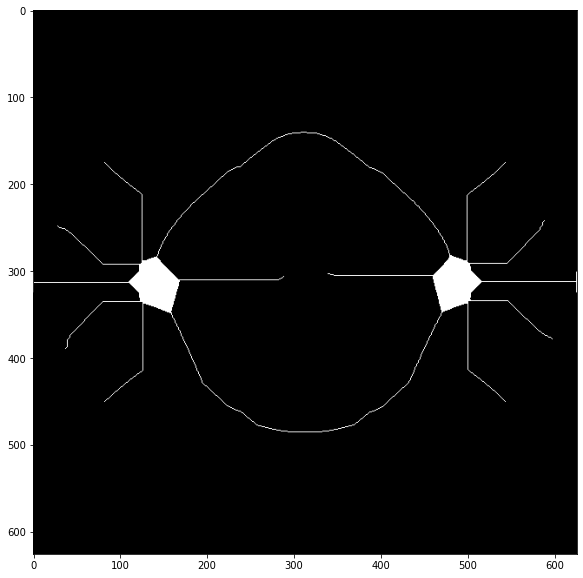

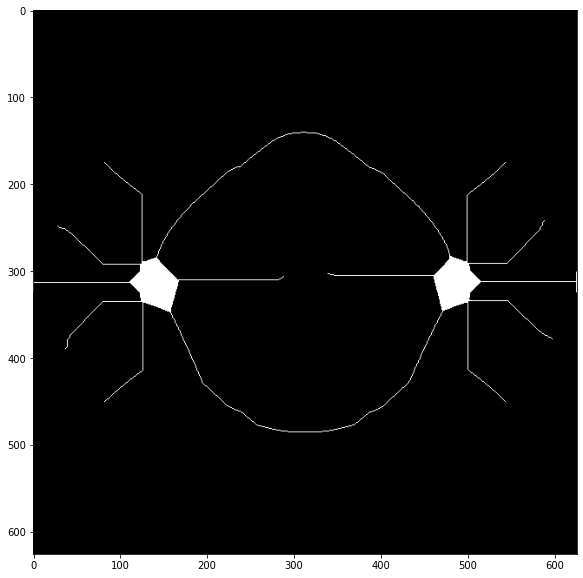

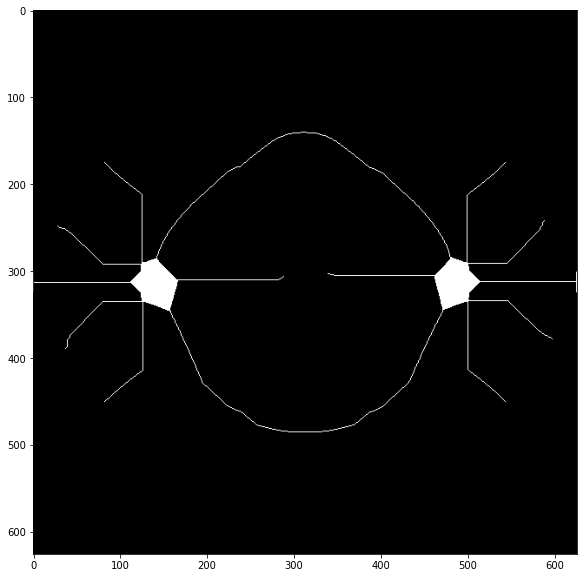

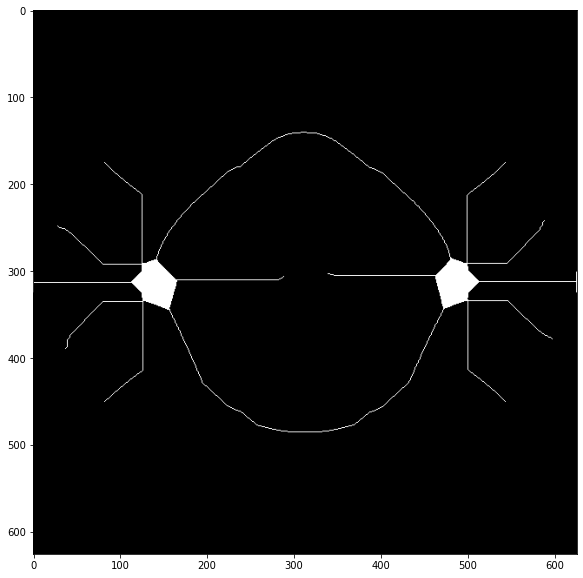

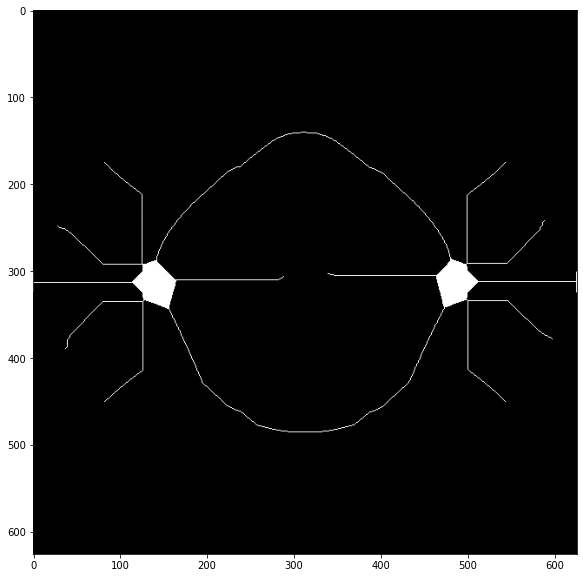

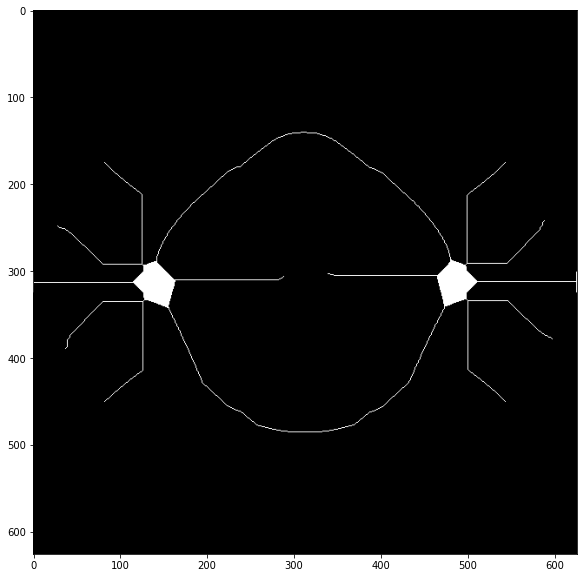

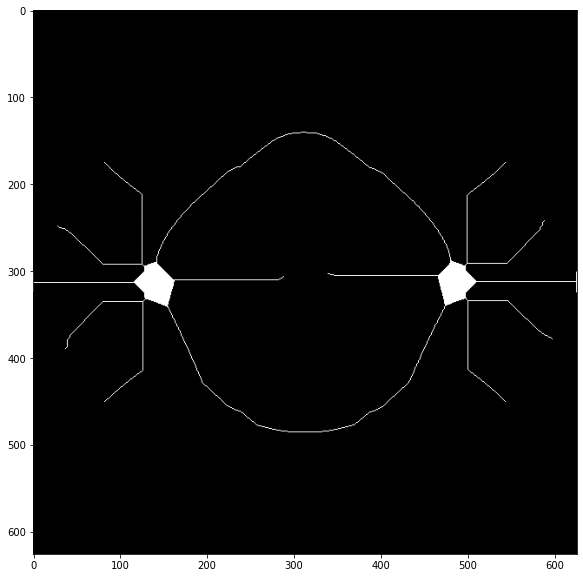

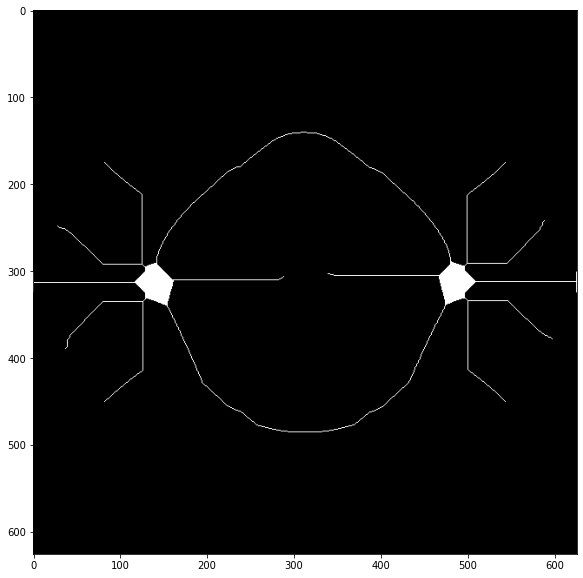

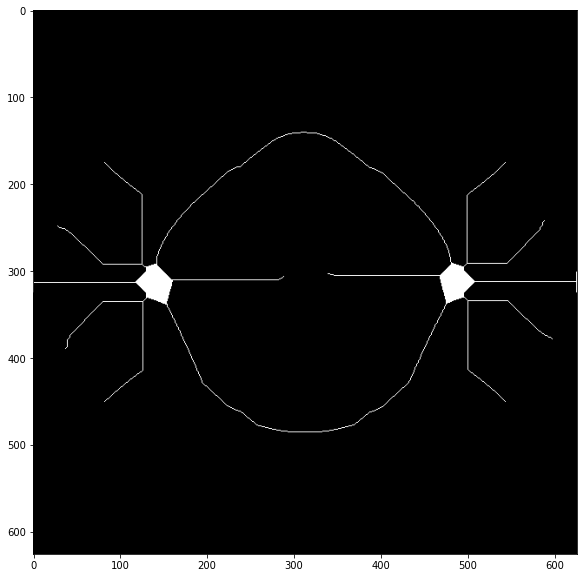

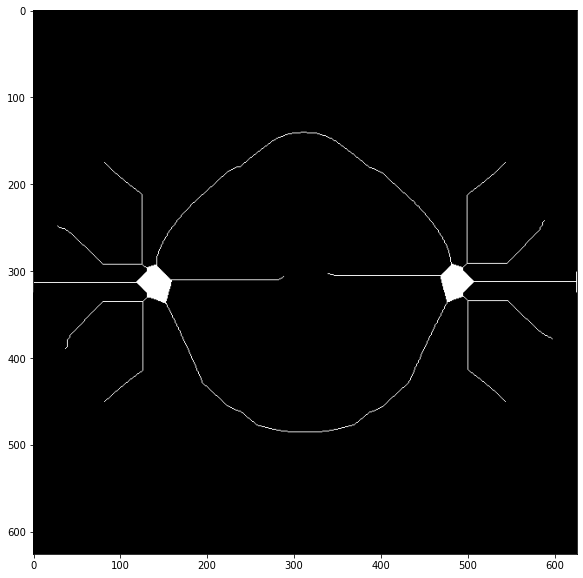

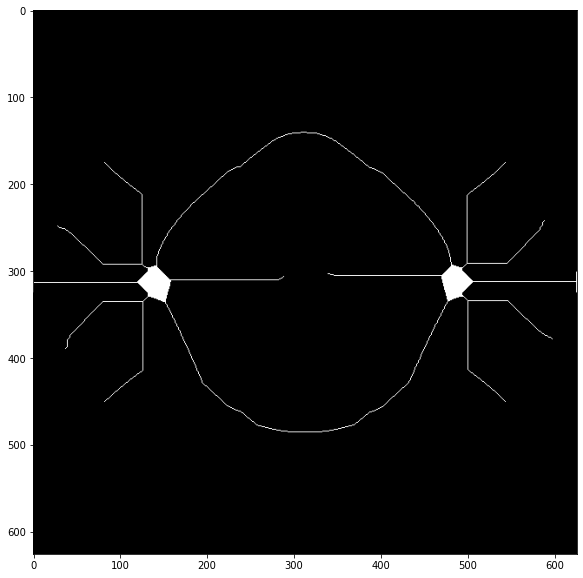

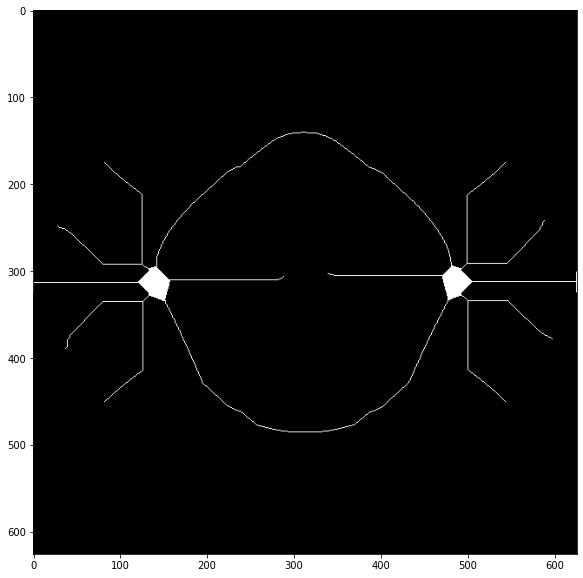

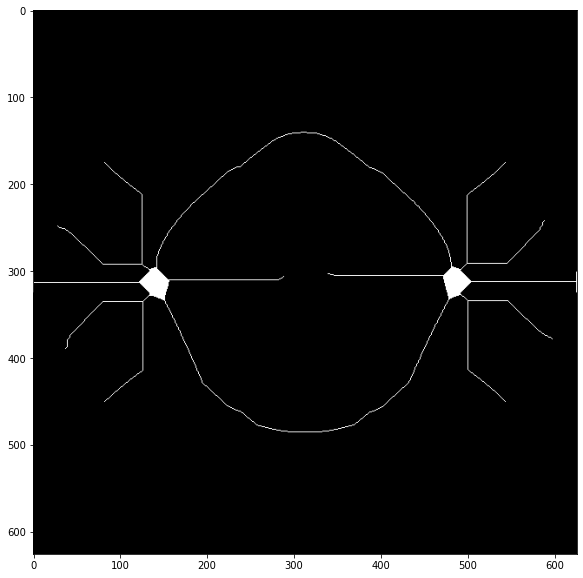

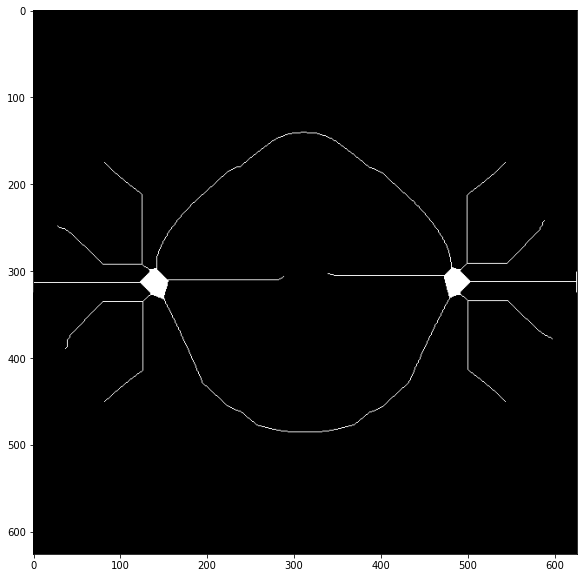

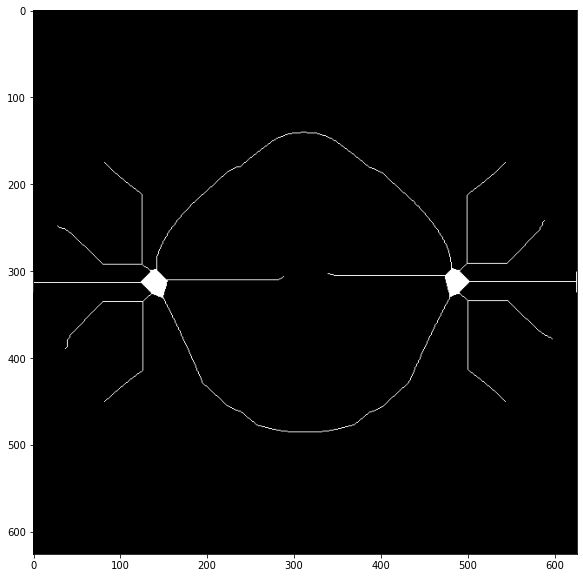

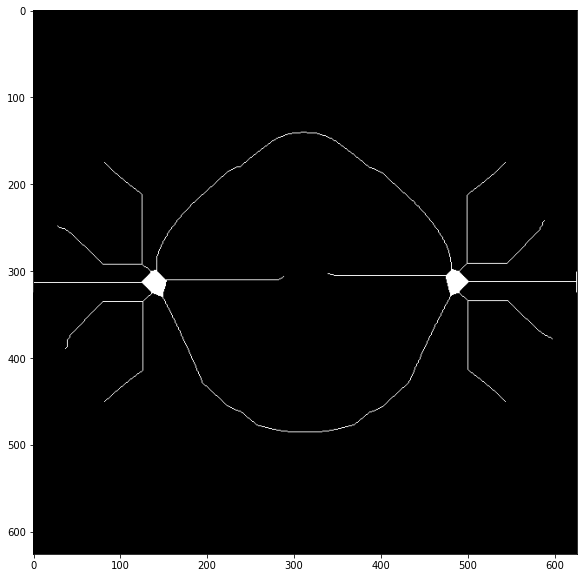

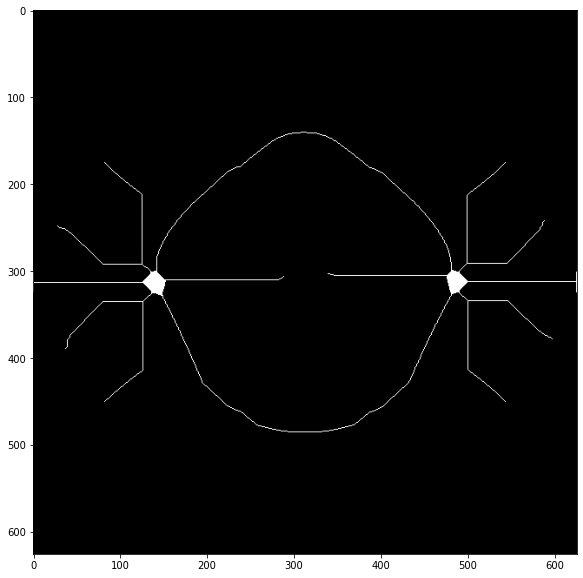

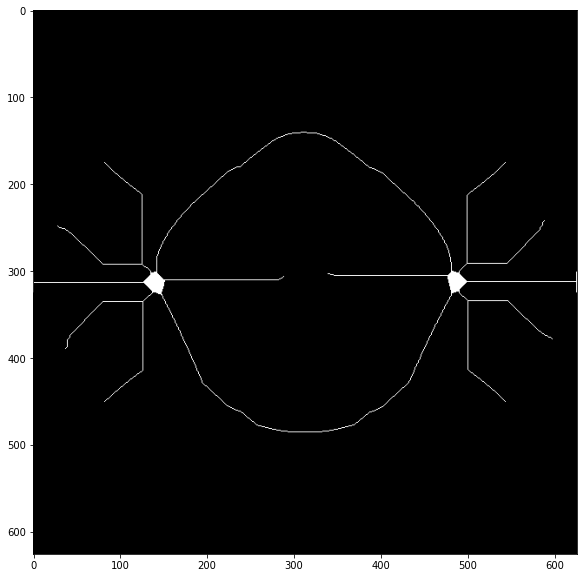

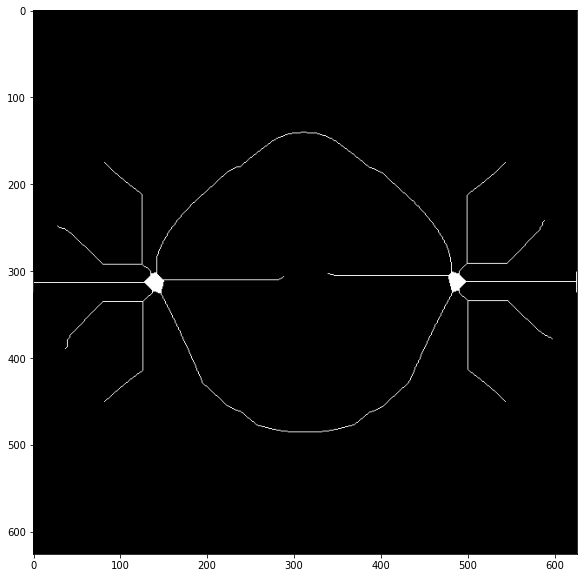

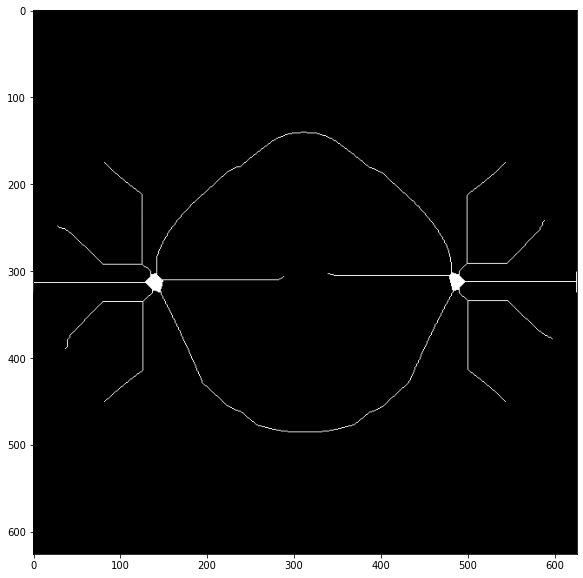

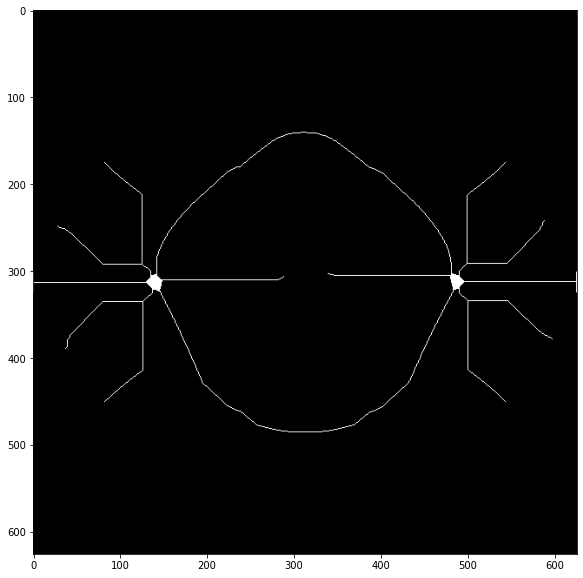

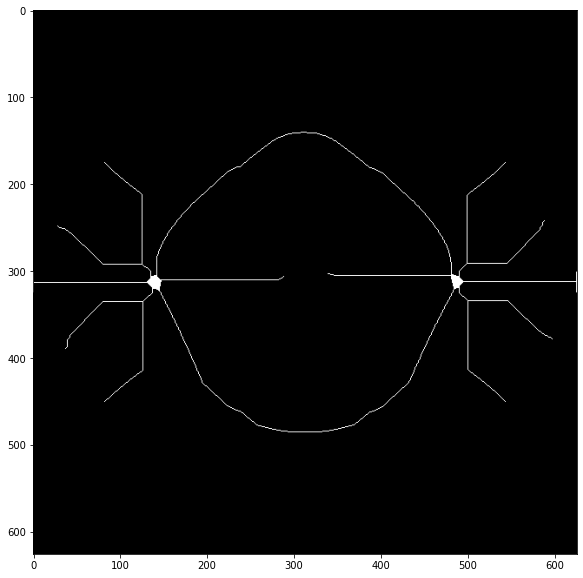

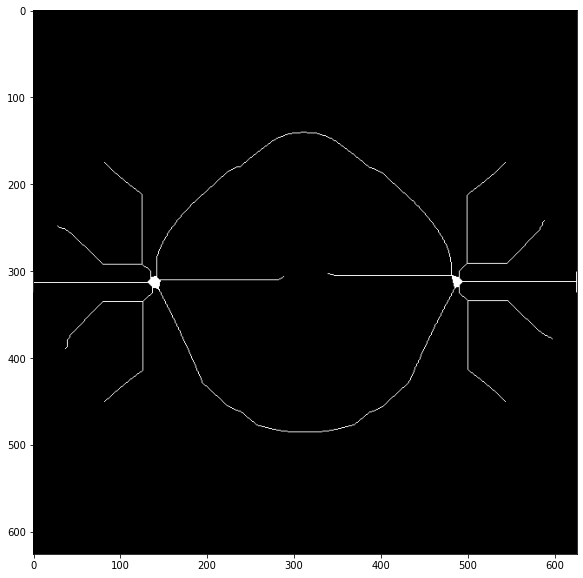

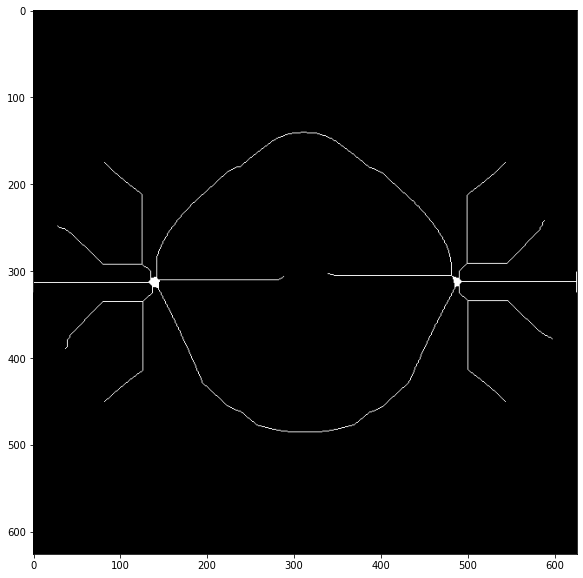

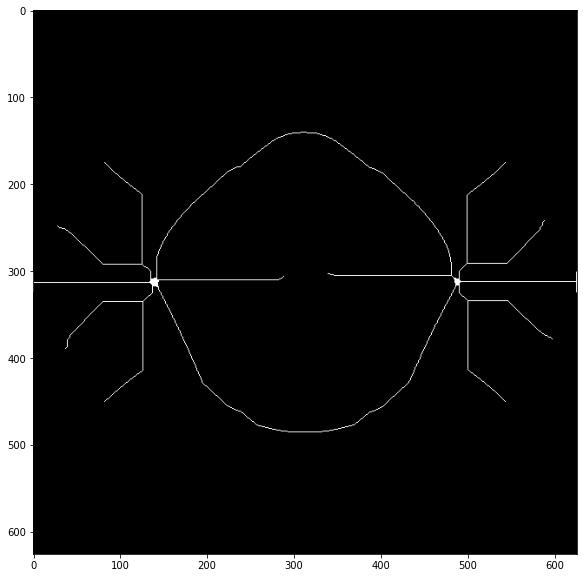

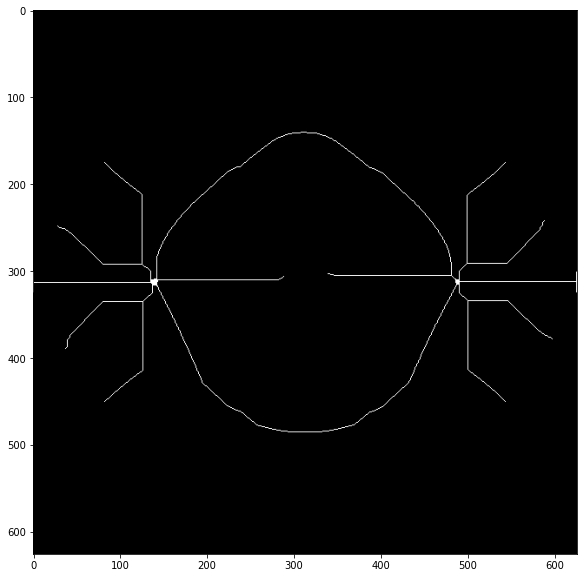

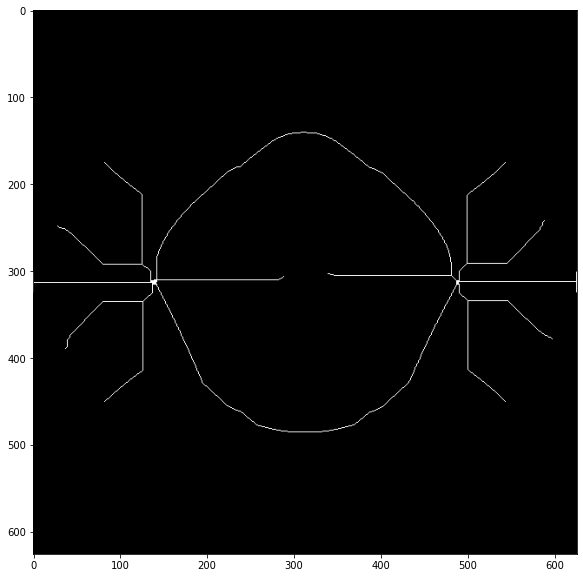

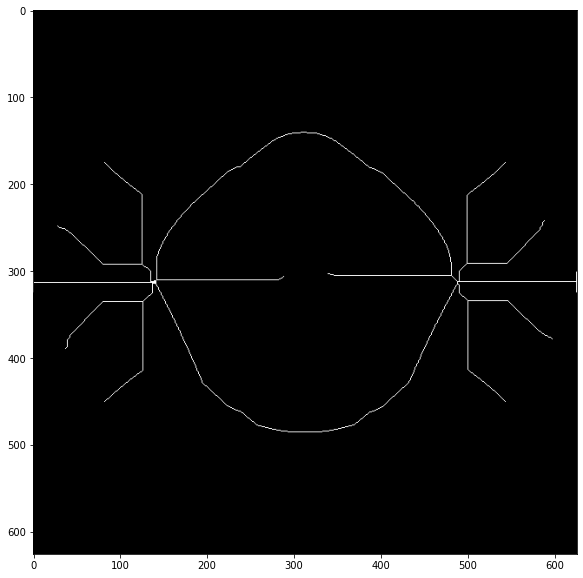

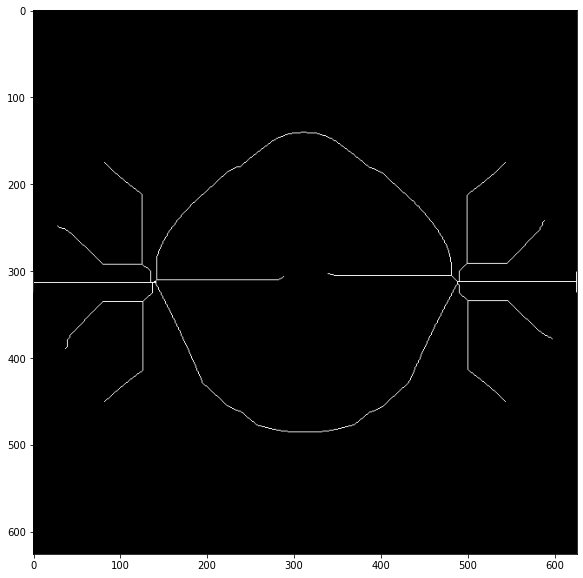

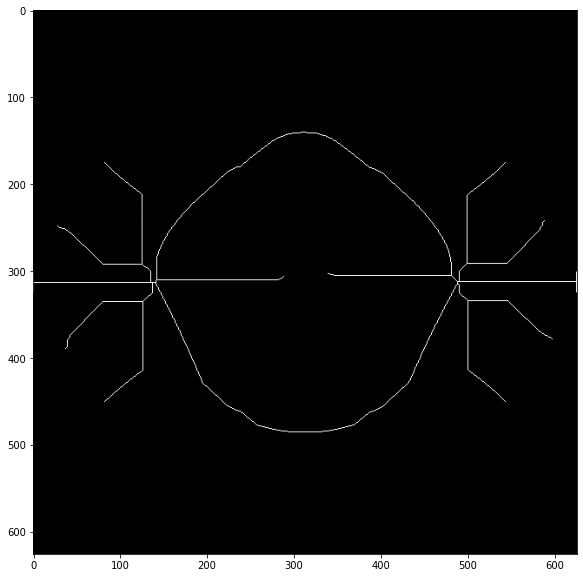

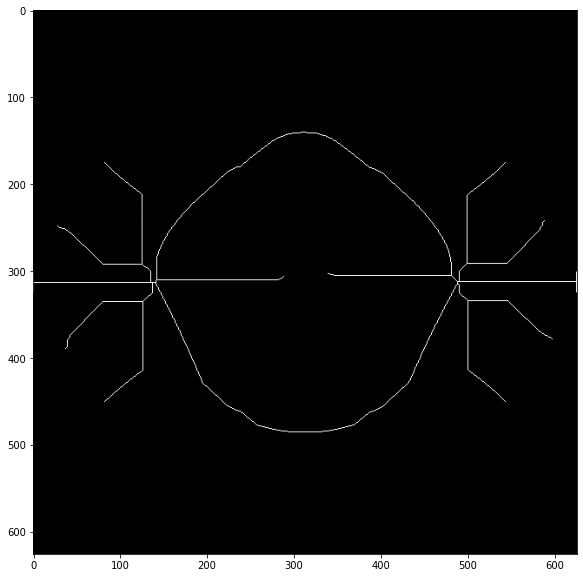

In [ ]:
keyhole = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "keyhole.jpg") , 0)
_,keyhole_t = cv2.threshold(keyhole,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # keyhole_t = 255 - keyhole_t
keyhole_t = np.uint8(keyhole_t/255)
keyhole_out = skeletonization(keyhole_t,True)